**Real Estate Listings Research**

**Project Overview**

This project involves analyzing data from a real estate service, focusing on an archive of apartment sale listings in Saint Petersburg and nearby areas over several years. The goal is to determine the market value of real estate properties. By establishing key parameters, we aim to develop an automated system that can identify anomalies and potential fraudulent activities.

**Data Description**

The dataset includes two types of data for each listed apartment:
- User-entered data
- Automatically generated data based on cartographic information (e.g., distance to the city center, airports, nearest parks, and water bodies).

The data is provided in a CSV file containing details about the location, sale, and descriptions of properties in Saint Petersburg and the Leningrad region.

**Research Plan**

1. **Data Exploration:**
   - Examine the data in the provided table.

2. **Handling Missing Values:**
   - Identify missing values and fill them where possible.

3. **Removing Outliers and Incorrect Data:**
   - Cleanse the data of any outliers and incorrect entries.

4. **Histogram and Boxplot Analysis:**
   - Analyze the histograms and boxplots for various parameters in the table.

5. **Conclusions:**
   - Draw conclusions based on the results obtained from the analysis.


### Open the data file and review the general information.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [4]:
try:
    data = pd.read_csv(r'C:\Users\olga.poletkina\OneDrive - HPP Architekten GmbH\GitHub\Practicum_Data_Science\datasets\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
    
initial_data = data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**Values ​​requiring data type changes:**

- floors_total (int) - integer, floating point is not suitable
- balcony (int) - integer, floating point is not suitable
- parks_around3000 (int) - integer, floating point is not suitable
- ponds_around3000 (int) - integer, floating point is not suitable
- days_exposition (int) - integer, floating point is not suitable (exposure in days)
- first_day_exposition - convert to date

In [7]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


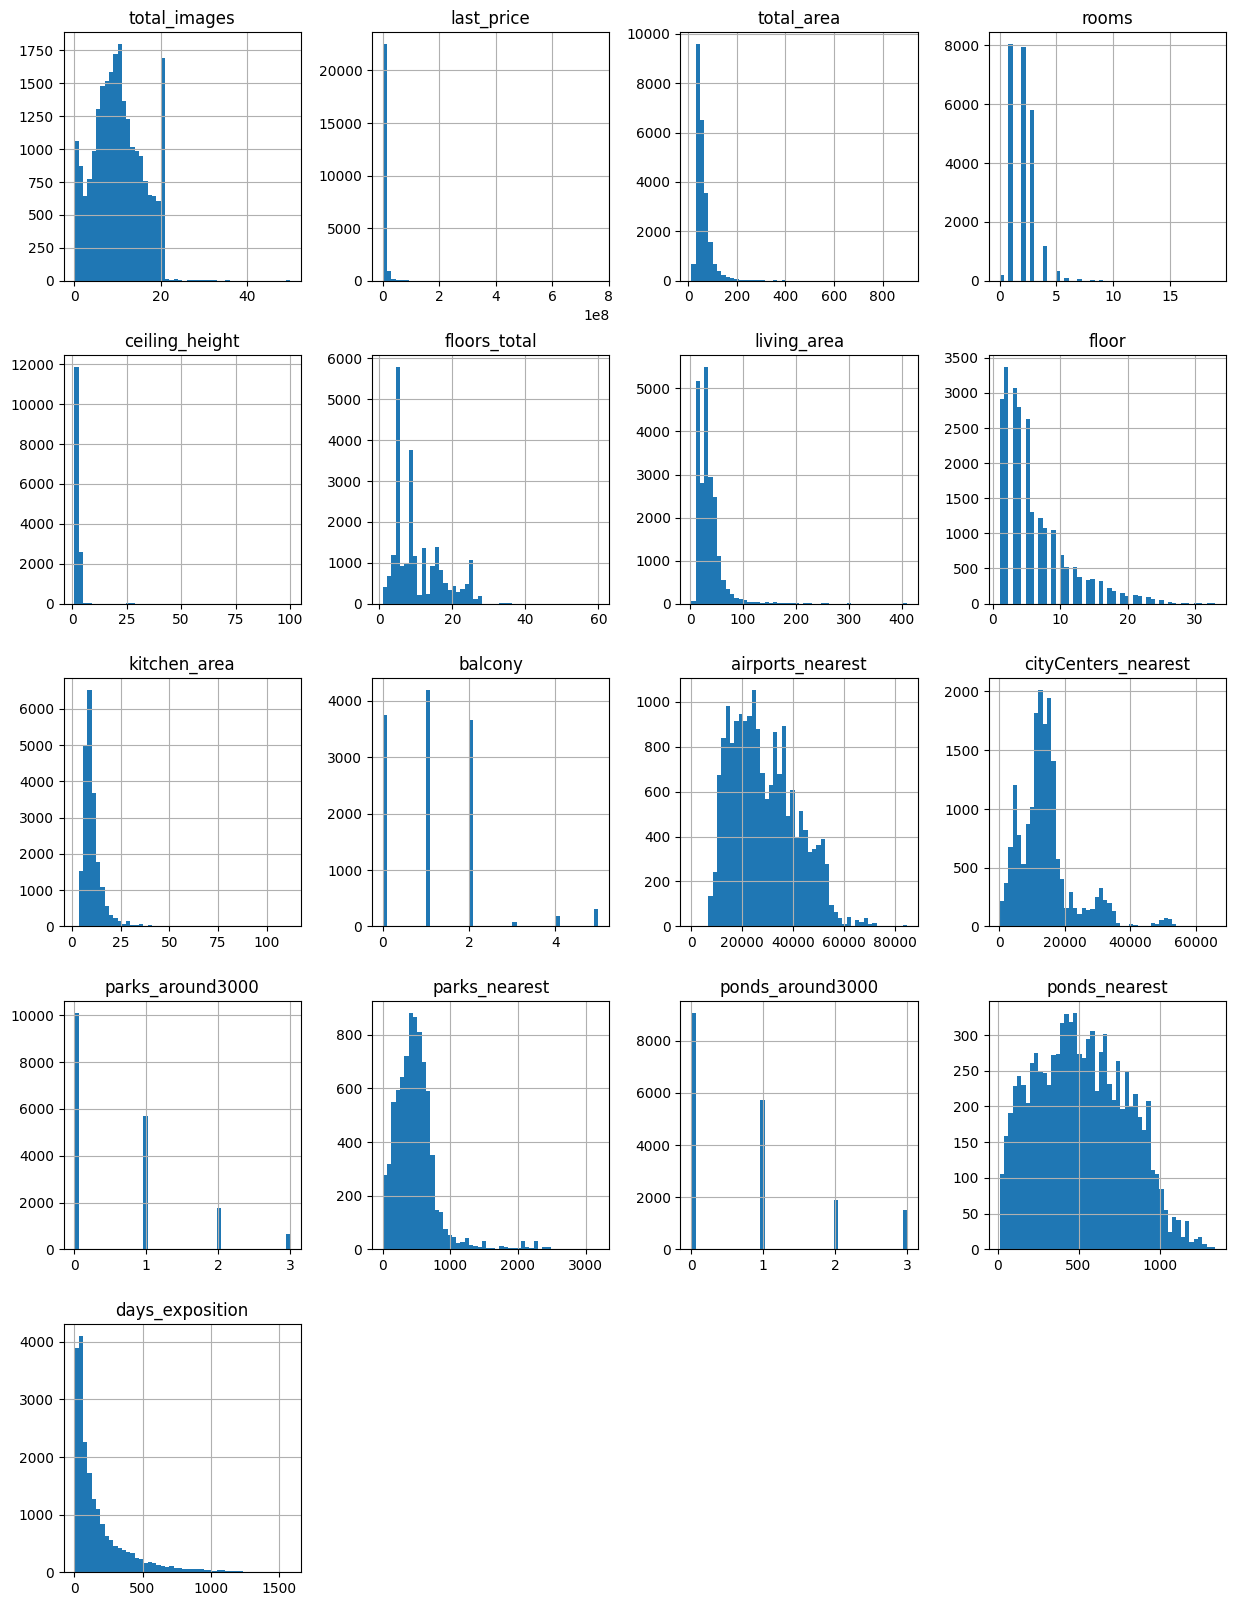

In [8]:
data.hist(figsize=(15, 20), bins=50);

In [9]:
%%script echo skipping

pd.plotting.scatter_matrix(data[[
    'total_area', 'rooms','ceiling_height', 'living_area', 
    'floor', 'balcony', 'kitchen_area', 'days_exposition', 'floors_total'
    ]], figsize=(15, 15))

Couldn't find program: 'echo'


0.9395373338721494


<Axes: xlabel='total_area', ylabel='living_area'>

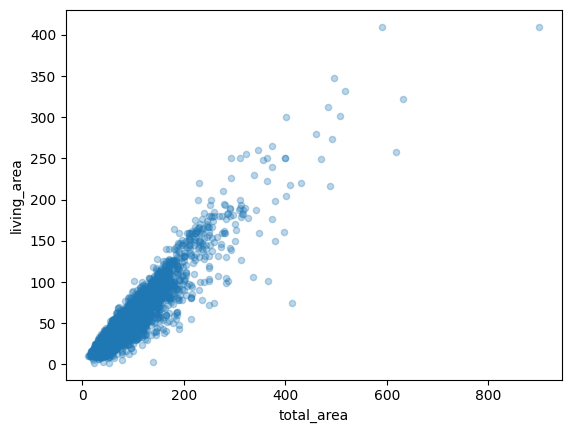

In [10]:
# %%script echo skipping

print(data['total_area'].corr(data['living_area']))
data.plot(x='total_area', y='living_area', kind='scatter', alpha=0.3)

**In total_area, unlike living_area, there are no gaps, but there is a strong dependence between these two parameters.**

In [11]:
# %%script echo skipping

print(data['kitchen_area'].corr(data['total_area']))
print(data['kitchen_area'].corr(data['living_area']))
# pd.plotting.scatter_matrix(data[['total_area', 'living_area', 'kitchen_area']], figsize=(15, 15))

0.6091211711198316
0.42867430668441237


In [12]:
data.duplicated().sum()

0

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Based on the results of the data study, the following were identified:**
- omissions and incorrect data types in some columns.
- there are outliers and anomalies in the data.
- there are no obvious duplicates.

In [14]:
data['floors_total'].value_counts()

floors_total
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: count, dtype: int64

### Data preprocessing

**The gaps in the floors_total and locality_name columns are small, so rows with NaN are removed.**

In [15]:
data = data.dropna(subset=['floors_total', 'locality_name'])
data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23561,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23562,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23563,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


**The is_apartment blank can be filled in as False, since they were most likely missed when entering information for regular apartments.**

In [16]:
warnings.filterwarnings("ignore")

data['is_apartment'] = data['is_apartment'].fillna(False)

**Checking for unique values ​​in columns.**

In [17]:
for name in data.columns:
    print(name, '  ', len(data[name].unique()))

total_images    38
last_price    2925
total_area    2159
first_day_exposition    1489
rooms    17
ceiling_height    184
floors_total    36
living_area    1770
floor    33
is_apartment    2
studio    2
open_plan    2
kitchen_area    964
balcony    7
locality_name    364
airports_nearest    8252
cityCenters_nearest    7624
parks_around3000    5
parks_nearest    995
ponds_around3000    5
ponds_nearest    1097
days_exposition    1140


In [18]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

**Blanks in the balcony column are interpreted as the absence of a balcony in the property, so they are replaced with 0.**

In [19]:
warnings.filterwarnings("ignore")

data['balcony'] = data['balcony'].fillna(0)

In [20]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [21]:
%%script echo skipping

data['locality_name'].unique()

Couldn't find program: 'echo'


In [22]:
len(data['locality_name'].unique())

364

In [23]:
name_check1 = ['посёлок', 'поселок']
name_check2 = ['товарищество']
name_options1 = []
name_options2 = []
for name in data['locality_name']:
    for word in name.split():
        if word in name_check1:
            if name not in name_options1:
                name_options1.append(name)
        elif word in name_check2:
            name_options2.append(name)
sorted(name_options1)
# name_options2

['городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'коттеджный поселок Кивеннапа Север',
 'коттеджный поселок Счастье',
 'коттеджный посёлок Лесное',
 'поселок Аннино',
 'поселок Барышево',
 'поселок Бугры',
 'поселок Возрождение',
 'поселок Войсковицы',
 'поселок Володарское',
 'поселок Гаврилово',
 'поселок Гарболово',
 'поселок Гладкое',
 'поселок Глажево',
 'поселок Глебычево',
 'поселок Гончарово',
 'поселок Громово',
 'поселок Дружноселье',
 'поселок Елизаветино',
 'поселок Жилгородок',
 'поселок Жилпосёлок',
 'поселок Житково',
 'поселок Заводской',
 'поселок Запорожское',
 'поселок Зимитицы',
 'посел

**In this cycle, all location names are sorted out and a list of unique values ​​is generated. When sorting the list, it is easy to see the existing types of settlements and variations of their names, and draw a conclusion about what can be changed to eliminate duplicates.**

**There is heterogeneity in the names of settlements; it makes sense to bring them to the same type name and replace the variant types of settlements with the same type (this mainly applies to villages).**

In [24]:
warnings.filterwarnings("ignore")

data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [25]:
warnings.filterwarnings("ignore")

data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

In [26]:
%%script echo skipping

for name in data['locality_name']:
    try:
        geo_name = []
        for word in name.split():
            if word[0].isupper():
                geo_name.append(word)
                final_name = ' '.join(geo_name)
        data['locality_name'] = data['locality_name'].replace(name, final_name)
    except:
        pass

Couldn't find program: 'echo'


**I used this cycle to form geographical names without a settlement type. The idea turned out to be wrong, since there are different types of settlements with the same names and the data can be erroneously distorted. I left the cycle here for myself, in case it comes in handy someday :-).**

In [27]:
len(data['locality_name'].unique())

318

In [28]:
sorted(data['ceiling_height'].round(1).unique())

[2.7,
 nan,
 1.0,
 1.2,
 1.8,
 2.0,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.2,
 5.3,
 5.5,
 5.6,
 5.8,
 6.0,
 8.0,
 8.3,
 10.3,
 14.0,
 20.0,
 22.6,
 24.0,
 25.0,
 26.0,
 27.0,
 27.5,
 32.0,
 100.0]

**The ceiling_height column contains anomalous heights, which were most likely recorded in units other than meters; accordingly, they are converted to meters. All abnormally high - more than 4 and low - less than 1.8 rooms are removed. I replace the blanks with the median value, because most likely the empty lines refer to unremarkable ceilings, so they are most likely standard: 2.4 - 2.7 and depend on the number of floors of the building and the year of construction.**

In [29]:
len(data[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2)])

78

In [30]:
warnings.filterwarnings("ignore")

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10

In [31]:
data = data.drop(data[data.ceiling_height < 2].index)
data = data.drop(data[data.ceiling_height > 4].index)
# len(data[(data['ceiling_height'] > 4) | (data['ceiling_height'] <= 1.8)])

In [32]:
data.pivot_table(index='floors_total', values='ceiling_height', aggfunc='median')

,ceiling_height
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


In [33]:
for f in data['floors_total'].unique():
    data.loc[(data['floors_total'] == f) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == f), 'ceiling_height'].median()

**Ceiling heights are a standardized thing, and if we knew the year the building was built, then using the series we could estimate the heights quite accurately. The number of storeys can also indicate a series, for example, the ceiling height in a 5- and 9-story building is expected to be 2.55, taller houses may belong to buildings after 2000 and it can be assumed that the height there varies from 2.4 to 2.7. But these data, of course, cannot be called super accurate, but the resulting heights did not arouse strong suspicions in me.
There are, of course, non-standard houses that can give distortions, and these are mostly not standard 6-7 floors (we did not have series with such houses, perhaps these are dilapidated buildings or reconstruction).**

In [34]:
# data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data[data['ceiling_height'].isna()]
data[data['floors_total'] == 33.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


In [35]:
data = data.dropna(subset=['ceiling_height'])

**We check whether there are rows in the table where the living area is greater than the total or the sum of the living area and kitchen area is greater than the total, which is an error.**

In [36]:
check_liv_total = data['living_area'] > data['total_area']
check_liv_total.unique()

array([False])

In [37]:
check_kit_liv_total = []
for index, row in data.iterrows():
    if row['kitchen_area'] + row['living_area'] >= row['total_area']:
        check_kit_liv_total.append(index)
print(len(check_kit_liv_total))

data.query('index in @check_kit_liv_total')

132


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.20,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.00,2018-07-09T00:00:00,1,2.50,25.0,28.00,6,False,...,9.00,0.0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.70,18.0,20.00,9,False,...,5.00,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.28,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,False,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22693,8,7400000.0,82.40,2017-07-25T00:00:00,2,2.80,26.0,57.40,26,False,...,25.00,5.0,Санкт-Петербург,40648.0,9888.0,1.0,1248.0,0.0,NaN,482.0
22963,16,3150000.0,102.00,2018-06-26T00:00:00,5,2.55,9.0,78.00,8,False,...,24.00,1.0,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,57.0
23202,13,4919880.0,67.92,2018-10-23T00:00:00,2,2.80,3.0,63.00,3,False,...,13.04,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0
23297,10,1850000.0,48.20,2019-03-13T00:00:00,2,2.55,5.0,42.20,2,False,...,6.00,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0


**Lines with an error are found and discarded.**

In [38]:
data = data.drop(index=check_kit_liv_total)
data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23371,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23372,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.0,4,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23373,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.7,1,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23374,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [39]:
%%script echo skipping

check_ratio_kit_living = []
for index, row in data.iterrows():
    ratio = (row['living_area'] * 100) / (row['kitchen_area'] + row['living_area'])
    check_ratio_kit_living.append(ratio)
print('в целом, между жилой площадью и площадью кухни, процентное соотношение = {}% к {}%'.format(
    round(pd.Series(check_ratio_kit_living).median(), 2), round(100 - pd.Series(check_ratio_kit_living).median(), 2)))

Couldn't find program: 'echo'


**There is a strong connection between the parameters total_area and living_area, so I decided to fill in the gaps in living_area and kitchen_area based on the value of total_area. To do this, I grouped the total area by values ​​and I took the median of the coefficient of dependence of the total area on the living area.**

In [40]:
def area_range(total_area):
    if 10 <= total_area <= 20:
        return '10-20'
    elif 20 < total_area <= 50:
        return '21-50'
    elif 50 < total_area <= 100:
        return '51-100'
    elif 100 < total_area <= 300:
        return '101-300'
    elif 300 < total_area <= 500:
        return '301-500'
    elif 500 < total_area:
        return '501-max'

data['area_range'] = data['total_area'].apply(area_range)  

**Now I create two coefficients that will help calculate the areas for missing values. iving_kit_total_coef - the value that gives the amount of living space. and pl. kitchens, ratio_liv or ratio_kit show the percentage ratio between the living area and the area. kitchens inside the resulting value.**

In [41]:
%%script echo skipping

data['living_kit_total_coef'] = (data['living_area'] + data['kitchen_area']) / data['total_area']
data['ratio_liv'] = data['living_area'] / (data['kitchen_area'] + data['living_area'])
data['ratio_kit'] = data['kitchen_area'] / (data['kitchen_area'] + data['living_area'])
data

Couldn't find program: 'echo'


In [42]:
data['ratio_liv'] = data['living_area'] / data['total_area']
data['ratio_kit'] = data['kitchen_area'] /  data['total_area']

In [43]:
ratio_liv_unique = []
for item in data['ratio_liv']:
    if str(item) != 'nan':
        if round(item, 3) not in ratio_liv_unique:
            ratio_liv_unique.append(round(item, 3))
sorted(ratio_liv_unique)    

[0.022,
 0.038,
 0.07,
 0.073,
 0.087,
 0.135,
 0.141,
 0.158,
 0.16,
 0.163,
 0.173,
 0.174,
 0.179,
 0.184,
 0.188,
 0.194,
 0.196,
 0.197,
 0.199,
 0.201,
 0.202,
 0.208,
 0.209,
 0.21,
 0.212,
 0.216,
 0.226,
 0.227,
 0.229,
 0.231,
 0.232,
 0.233,
 0.234,
 0.235,
 0.236,
 0.24,
 0.241,
 0.243,
 0.246,
 0.248,
 0.249,
 0.25,
 0.251,
 0.252,
 0.253,
 0.255,
 0.256,
 0.259,
 0.26,
 0.261,
 0.263,
 0.264,
 0.265,
 0.266,
 0.267,
 0.268,
 0.269,
 0.27,
 0.272,
 0.273,
 0.274,
 0.275,
 0.276,
 0.277,
 0.278,
 0.279,
 0.28,
 0.281,
 0.282,
 0.283,
 0.284,
 0.285,
 0.286,
 0.287,
 0.288,
 0.289,
 0.29,
 0.291,
 0.292,
 0.293,
 0.294,
 0.295,
 0.296,
 0.297,
 0.298,
 0.299,
 0.3,
 0.301,
 0.302,
 0.303,
 0.304,
 0.305,
 0.306,
 0.307,
 0.308,
 0.309,
 0.31,
 0.311,
 0.312,
 0.313,
 0.314,
 0.315,
 0.316,
 0.317,
 0.318,
 0.319,
 0.32,
 0.321,
 0.322,
 0.323,
 0.324,
 0.325,
 0.326,
 0.327,
 0.328,
 0.329,
 0.33,
 0.331,
 0.332,
 0.333,
 0.334,
 0.335,
 0.336,
 0.337,
 0.338,
 0.339,
 0.34,

In [44]:
ratio_liv_unique = []
for item in data['ratio_kit']:
    if str(item) != 'nan':
        if round(item, 3) not in ratio_liv_unique:
            ratio_liv_unique.append(round(item, 3))
sorted(ratio_liv_unique)

[0.025,
 0.026,
 0.029,
 0.031,
 0.034,
 0.042,
 0.043,
 0.044,
 0.045,
 0.046,
 0.047,
 0.048,
 0.049,
 0.05,
 0.051,
 0.052,
 0.053,
 0.054,
 0.055,
 0.056,
 0.058,
 0.059,
 0.06,
 0.061,
 0.062,
 0.063,
 0.064,
 0.065,
 0.066,
 0.067,
 0.068,
 0.069,
 0.07,
 0.071,
 0.072,
 0.073,
 0.074,
 0.075,
 0.076,
 0.077,
 0.078,
 0.079,
 0.08,
 0.081,
 0.082,
 0.083,
 0.084,
 0.085,
 0.086,
 0.087,
 0.088,
 0.089,
 0.09,
 0.091,
 0.092,
 0.093,
 0.094,
 0.095,
 0.096,
 0.097,
 0.098,
 0.099,
 0.1,
 0.101,
 0.102,
 0.103,
 0.104,
 0.105,
 0.106,
 0.107,
 0.108,
 0.109,
 0.11,
 0.111,
 0.112,
 0.113,
 0.114,
 0.115,
 0.116,
 0.117,
 0.118,
 0.119,
 0.12,
 0.121,
 0.122,
 0.123,
 0.124,
 0.125,
 0.126,
 0.127,
 0.128,
 0.129,
 0.13,
 0.131,
 0.132,
 0.133,
 0.134,
 0.135,
 0.136,
 0.137,
 0.138,
 0.139,
 0.14,
 0.141,
 0.142,
 0.143,
 0.144,
 0.145,
 0.146,
 0.147,
 0.148,
 0.149,
 0.15,
 0.151,
 0.152,
 0.153,
 0.154,
 0.155,
 0.156,
 0.157,
 0.158,
 0.159,
 0.16,
 0.161,
 0.162,
 0.163,
 0.16

In [45]:
%%script echo skipping

print(len(data[data['living_kit_total_coef']>=1]))
print(len(data[data['ratio_liv']>=1]))
print(len(data[data['ratio_kit']>=1]))

Couldn't find program: 'echo'


In [46]:
print(len(data[data['ratio_liv']>=1]))
print(len(data[data['ratio_kit']>=1]))

2
0


In [47]:
ratio_mistake = data[(data['ratio_liv']>=1) & (data['studio']!=True)]
ratio_mistake.index
data = data.drop(index=ratio_mistake.index)
data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_range,ratio_liv,ratio_kit
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,101-300,0.472222,0.231481
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,21-50,0.460396,0.272277
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,51-100,0.612500,0.148214
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,101-300,NaN,NaN
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,51-100,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,...,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,101-300,0.547792,0.103356
23370,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,51-100,0.644068,0.144068
23371,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-100,0.523810,NaN
23372,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,51-100,NaN,0.303583


**We check the coefficient, if it is greater than or equal to 1, then the resulting area will be greater than or equal to the total, which will be an error. All obtained coefficients are less than 1.**

In [48]:
%%script echo skipping

for f in data['area_range'].unique():
    data.loc[(data['area_range'] == f) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['area_range'] == f), 'total_area'] * \
    data.loc[(data['area_range'] == f), 'living_kit_total_coef'].median() * \
    data.loc[(data['area_range'] == f), 'ratio_liv'].median()

Couldn't find program: 'echo'


In [49]:
for f in data['area_range'].unique():
    try:
        data.loc[(data['area_range'] == f) & (data['living_area'].isna()), 'living_area'] = \
        data.loc[(data['area_range'] == f), 'total_area'] * \
        data.loc[(data['area_range'] == f), 'ratio_liv'].median()
    except:
        pass

In [50]:
%%script echo skipping

for f in data['area_range'].unique():
    data.loc[(data['area_range'] == f) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['area_range'] == f), 'total_area'] * \
    data.loc[(data['area_range'] == f), 'living_kit_total_coef'].median() * \
    data.loc[(data['area_range'] == f), 'ratio_kit'].median() 

Couldn't find program: 'echo'


In [51]:
for f in data['area_range'].unique():
    try:
        data.loc[(data['area_range'] == f) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
        data.loc[(data['area_range'] == f), 'total_area'] * \
        data.loc[(data['area_range'] == f), 'ratio_kit'].median()
    except:
        pass

**In the original table there were no kitchens smaller than 1 m2, we check whether too small kitchens appeared after the calculations.**

In [52]:
data[data['kitchen_area']<1][['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23374 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23374 non-null  int64  
 1   last_price            23374 non-null  float64
 2   total_area            23374 non-null  float64
 3   first_day_exposition  23374 non-null  object 
 4   rooms                 23374 non-null  int64  
 5   ceiling_height        23374 non-null  float64
 6   floors_total          23374 non-null  float64
 7   living_area           23374 non-null  float64
 8   floor                 23374 non-null  int64  
 9   is_apartment          23374 non-null  bool   
 10  studio                23374 non-null  bool   
 11  open_plan             23374 non-null  bool   
 12  kitchen_area          23374 non-null  float64
 13  balcony               23374 non-null  float64
 14  locality_name         23374 non-null  object 
 15  airports_nearest      17

In [54]:
check_kit_liv_total = []
for index, row in data.iterrows():
    if row['kitchen_area'] + row['living_area'] >= row['total_area']:
        check_kit_liv_total.append(index)
print(len(check_kit_liv_total))

data[[
    'kitchen_area', 'living_area', 'total_area', 'area_range', 'studio', 'ratio_liv', 'ratio_kit'
    ]].query('index in @check_kit_liv_total')


61


,kitchen_area,living_area,total_area,area_range,studio,ratio_liv,ratio_kit
424,14.846579,88.000000,98.00,51-100,False,0.897959,NaN
440,5.908590,24.750000,27.11,21-50,True,0.912947,NaN
946,5.012821,18.000000,23.00,21-50,False,0.782609,NaN
2719,5.448718,21.000000,25.00,21-50,True,0.840000,NaN
2869,35.000000,43.287525,73.00,51-100,False,NaN,0.479452
...,...,...,...,...,...,...,...
21802,2.751667,15.890000,17.78,10-20,False,0.893701,NaN
22095,7.955128,33.200000,36.50,21-50,False,0.909589,NaN
22246,5.950000,23.300000,27.30,21-50,True,0.853480,NaN
22907,29.162791,200.000000,228.00,101-300,False,0.877193,NaN


In [55]:
data = data.drop(index=check_kit_liv_total)
data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_range,ratio_liv,ratio_kit
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,101-300,0.472222,0.231481
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.600000,1,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,21-50,0.460396,0.272277
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.300000,4,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,51-100,0.612500,0.148214
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14.0,94.380350,9,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,101-300,NaN,NaN
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,51-100,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23308,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,...,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,101-300,0.547792,0.103356
23309,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.000000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,51-100,0.644068,0.144068
23310,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.700000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-100,0.523810,NaN
23311,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,45.511199,12,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,51-100,NaN,0.303583


In [56]:
data = data.drop(columns=['area_range', 'ratio_liv', 'ratio_kit'])

**In studios, the kitchen is part of the common space, so the size of the kitchen in studios is equal to 0.**

In [57]:
data.loc[(data['studio']==True) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

0.6279562094952944


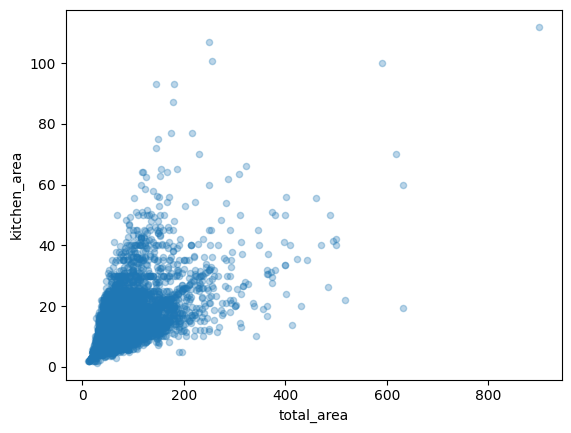

In [58]:
kitchen_data = data.loc[data['studio']==False, ['kitchen_area', 'total_area']]
print(kitchen_data['total_area'].corr(data['kitchen_area']))
kitchen_data.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.3);

**The remaining gaps remain unfilled for now.**

In [59]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5447
cityCenters_nearest      5427
parks_around3000         5426
parks_nearest           15370
ponds_around3000         5426
ponds_nearest           14370
days_exposition          3141
dtype: int64

**Changing data type.**

In [60]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [61]:
data['floors_total'] = data['floors_total'].astype(int, errors = 'ignore')
data['balcony'] = data['balcony'].astype(int, errors = 'ignore')

In [62]:
pd.to_numeric(data['parks_around3000'], errors='coerce')

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: parks_around3000, Length: 23313, dtype: float64

In [63]:
data.loc[data['parks_around3000'].notna(), 'parks_around3000'].astype('int')

0        1
1        0
2        1
3        2
4        2
        ..
23690    1
23691    0
23693    1
23694    1
23697    2
Name: parks_around3000, Length: 17887, dtype: int32

**Checking data type replacement.**

In [64]:
def item_type_check(data, column):
    check_list = []
    for item in data[column]:
        i_type = type(item)
        if i_type not in check_list:
            check_list.append(type(item))
            return check_list
        
item_type_check(data, 'parks_around3000')    

[float]

In [65]:
data['last_price'] = data['last_price'].astype(int, errors = 'ignore')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23313 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23313 non-null  int64         
 1   last_price            23313 non-null  int32         
 2   total_area            23313 non-null  float64       
 3   first_day_exposition  23313 non-null  datetime64[ns]
 4   rooms                 23313 non-null  int64         
 5   ceiling_height        23313 non-null  float64       
 6   floors_total          23313 non-null  int32         
 7   living_area           23313 non-null  float64       
 8   floor                 23313 non-null  int64         
 9   is_apartment          23313 non-null  bool          
 10  studio                23313 non-null  bool          
 11  open_plan             23313 non-null  bool          
 12  kitchen_area          23313 non-null  float64       
 13  balcony              

**Price per square meter.**

In [67]:
data['1_sq_m_price'] = data['last_price'] / data['total_area']

**Day of publication of the advertisement (0 - Monday, 1 - Tuesday, etc.).**

In [68]:
data['day_of_week'] = data['first_day_exposition'].dt.day_name()

**Month of publication of the advertisement.**

In [69]:
data['month'] = data['first_day_exposition'].dt.month

**Year of publication of the advertisement.**

In [70]:
data['year'] = data['first_day_exposition'].dt.year

**Apartment floor type (values ​​- “first”, “last”, “other”).**

In [71]:
def floor_type(x):
    if x.floor == 1:
        return 'первый'
    elif x.floor == x.floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type, axis = 1)
# data.loc[data['floor'] == 1, ['floors_total', 'floor_type']].head(30)

**Distance in km to the city center.**

In [72]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

In [73]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1_sq_m_price,day_of_week,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,Thursday,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.60000,1,False,...,NaN,0.0,NaN,81.0,82920.792079,Tuesday,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.30000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,Thursday,8,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,2.60,14,94.38035,9,False,...,84.0,3.0,234.0,424.0,408176.100629,Friday,7,2015,другой,6.800
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,Tuesday,6,2018,другой,8.098


### Exploratory data analysis


column name "total_images"

count    23313.000000
mean         9.872989
std          5.674642
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


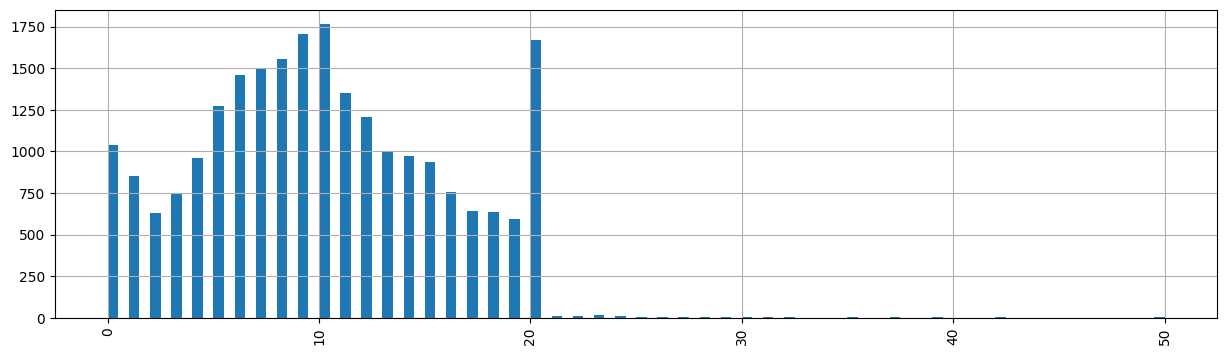

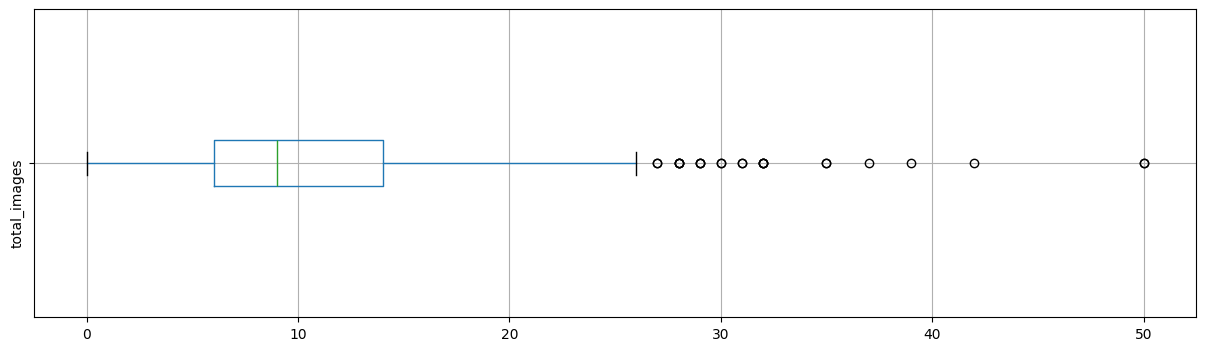


column name "last_price"

count    2.331300e+04
mean     6.488423e+06
std      1.071830e+07
min      1.219000e+04
25%      3.425000e+06
50%      4.640000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64


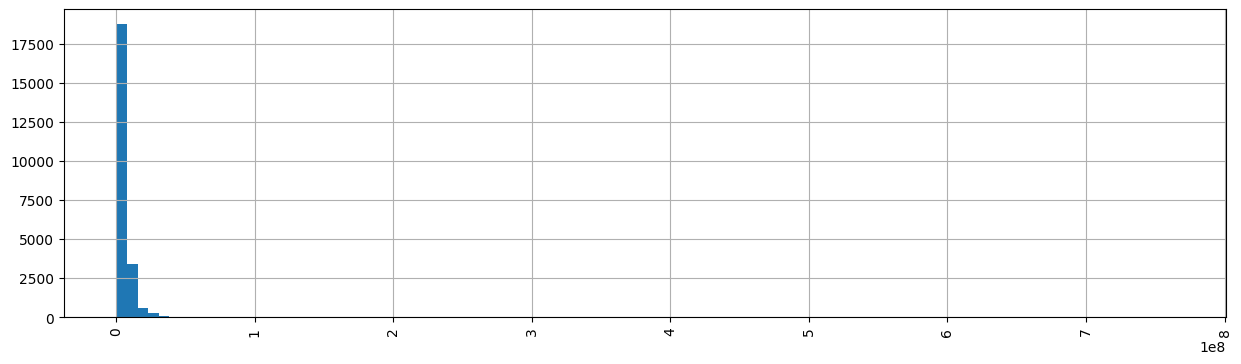

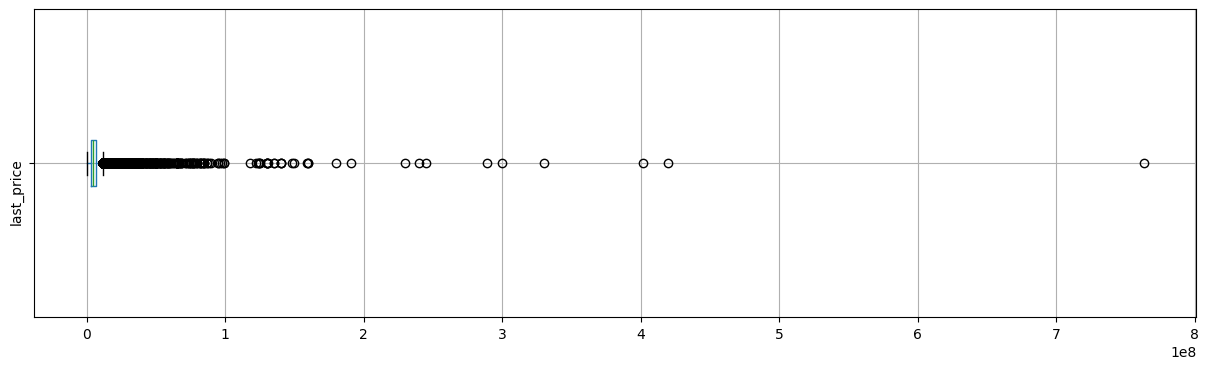


column name "total_area"

count    23313.000000
mean        60.229570
std         35.052299
min         12.000000
25%         40.000000
50%         52.000000
75%         69.610000
max        900.000000
Name: total_area, dtype: float64


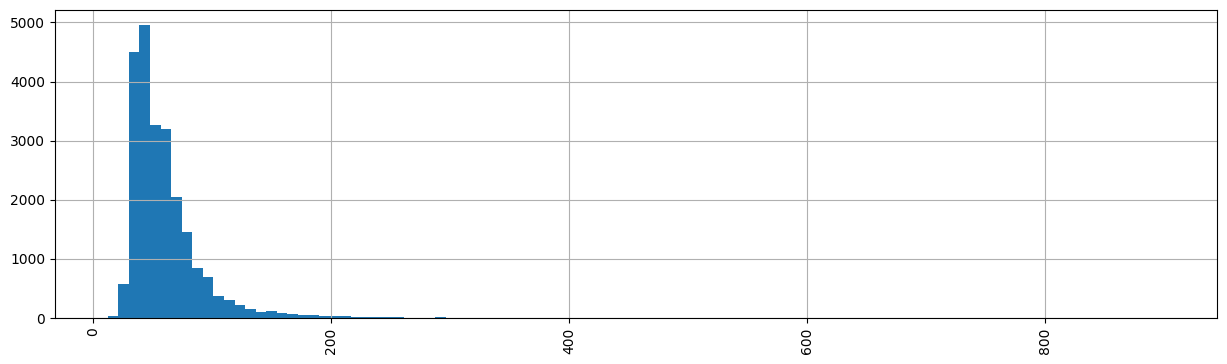

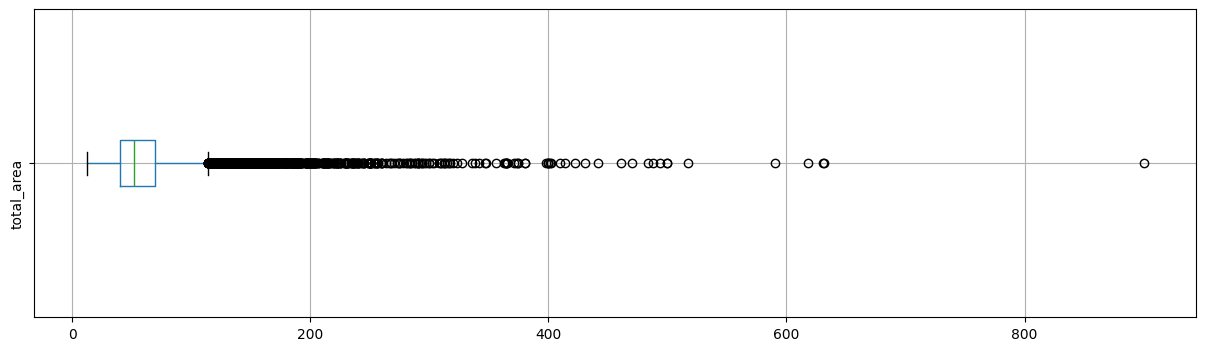


column name "first_day_exposition"

count                            23313
mean     2017-11-10 08:13:42.751254528
min                2014-11-27 00:00:00
25%                2017-05-15 00:00:00
50%                2017-12-12 00:00:00
75%                2018-08-26 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object


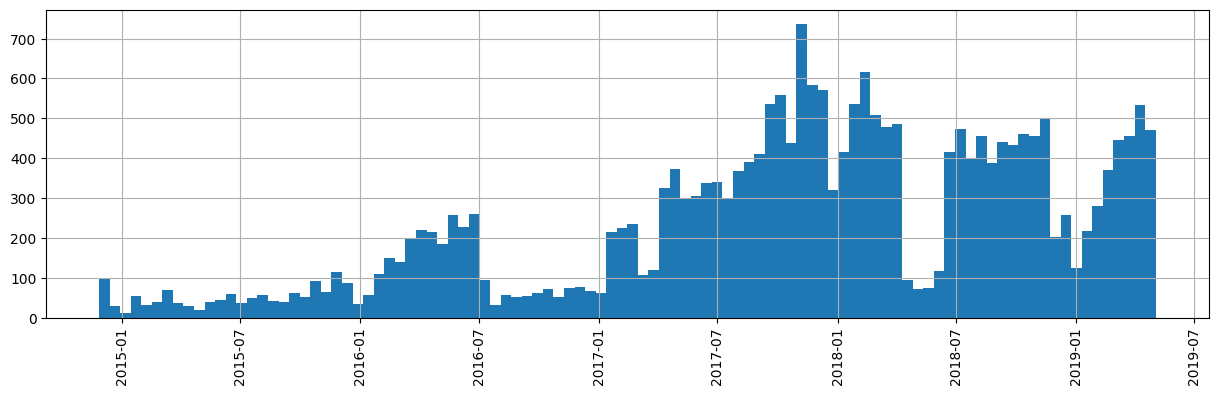


column name "rooms"

count    23313.000000
mean         2.072234
std          1.074370
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


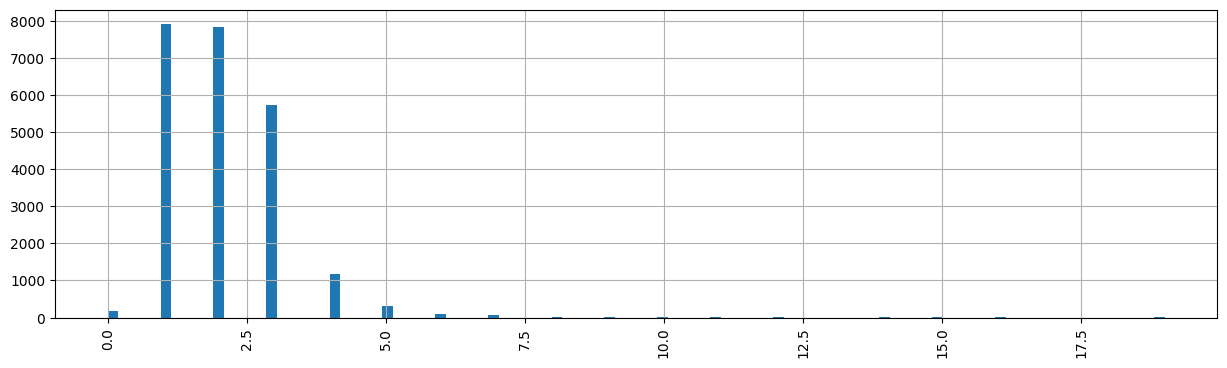

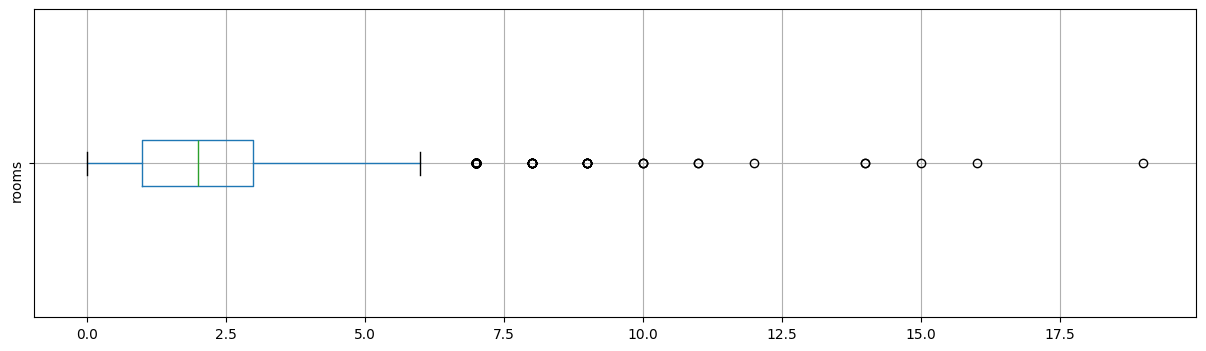


column name "ceiling_height"

count    23313.000000
mean         2.703678
std          0.219725
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64


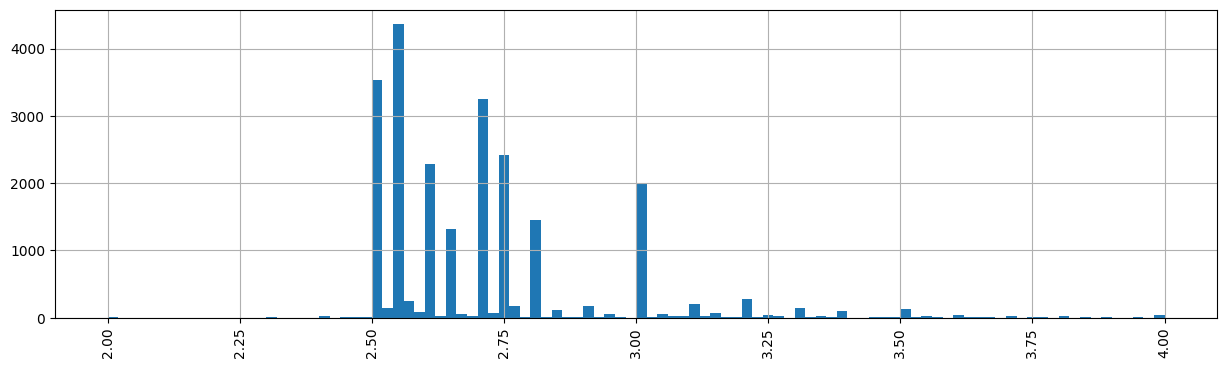

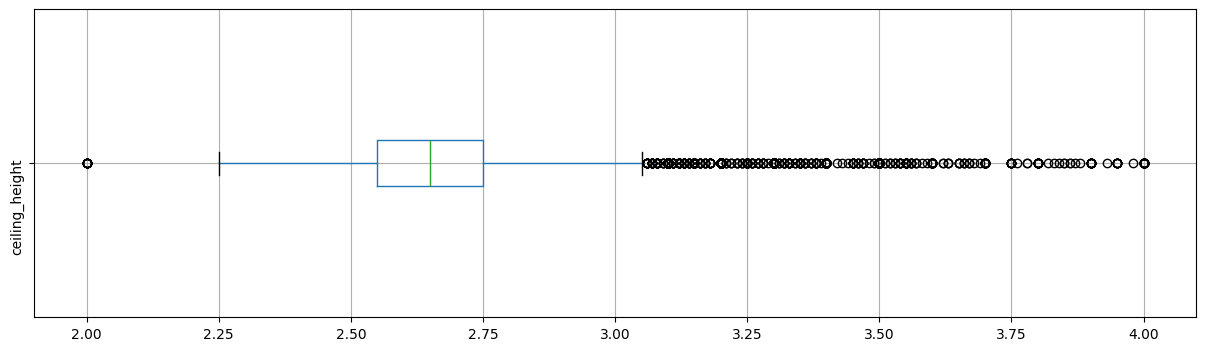


column name "floors_total"

count    23313.000000
mean        10.670613
std          6.579967
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


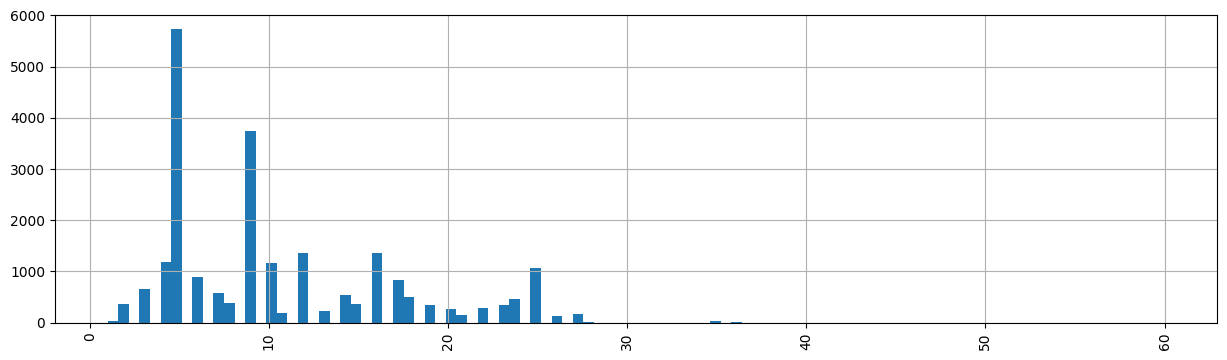

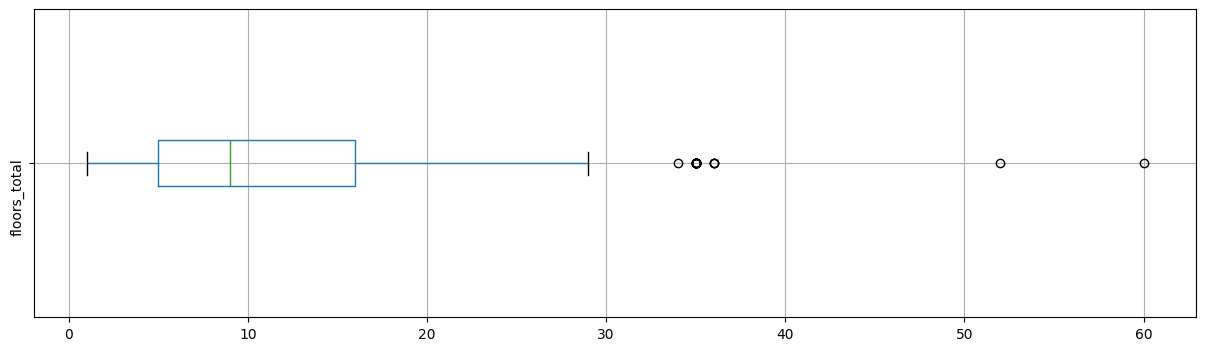


column name "living_area"

count    23313.000000
mean        34.439282
std         22.019130
min          2.000000
25%         18.900000
50%         30.000000
75%         42.160863
max        409.700000
Name: living_area, dtype: float64


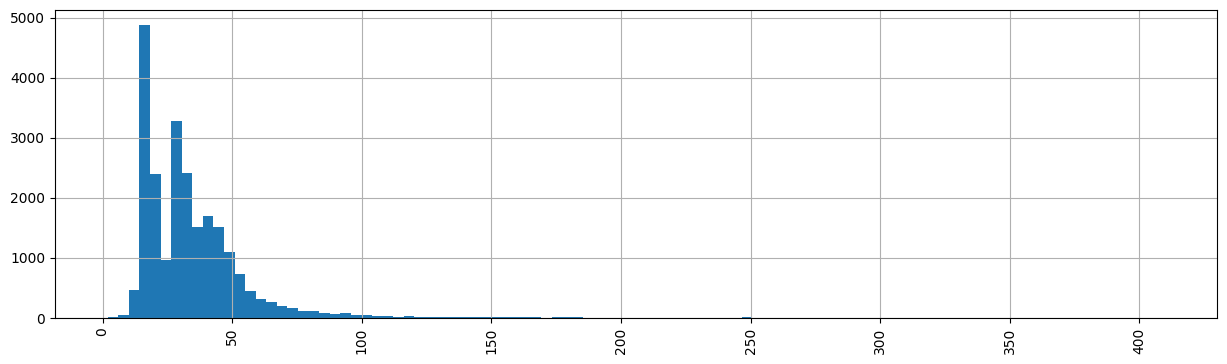

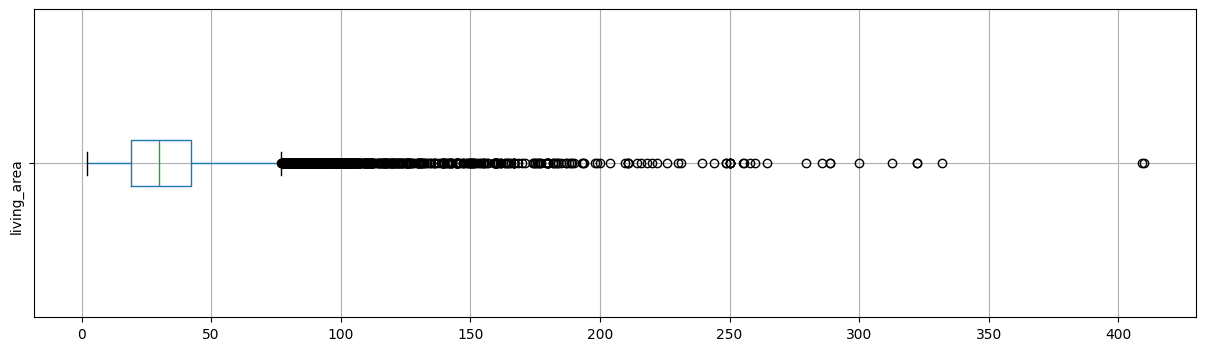


column name "floor"

count    23313.000000
mean         5.873118
std          4.863170
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


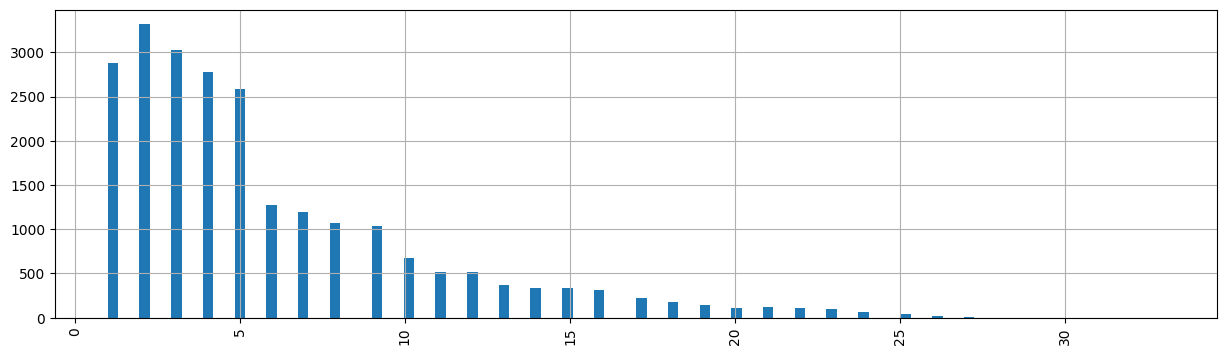

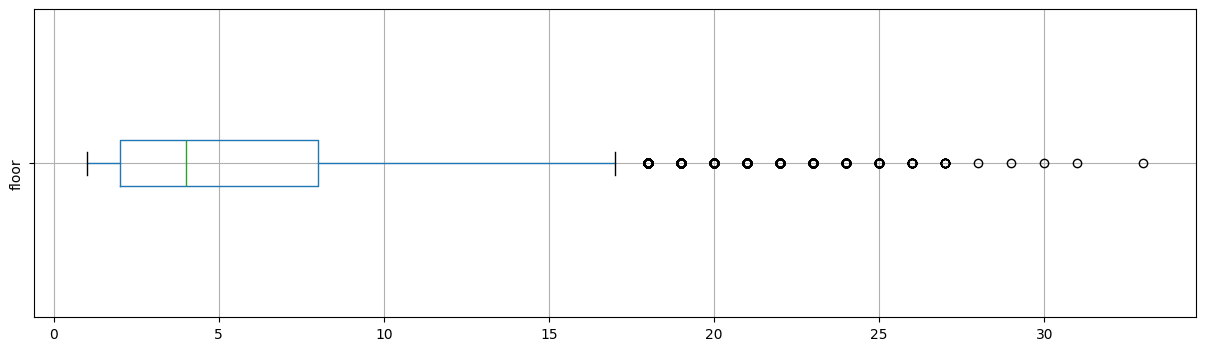


column name "is_apartment"

count     23313
unique        2
top       False
freq      23270
Name: is_apartment, dtype: object

column name "studio"

count     23313
unique        2
top       False
freq      23187
Name: studio, dtype: object

column name "open_plan"

count     23313
unique        2
top       False
freq      23253
Name: open_plan, dtype: object

column name "kitchen_area"

count    23313.000000
mean        10.421531
std          5.679413
min          1.300000
25%          7.000000
50%          9.080000
75%         11.780000
max        112.000000
Name: kitchen_area, dtype: float64


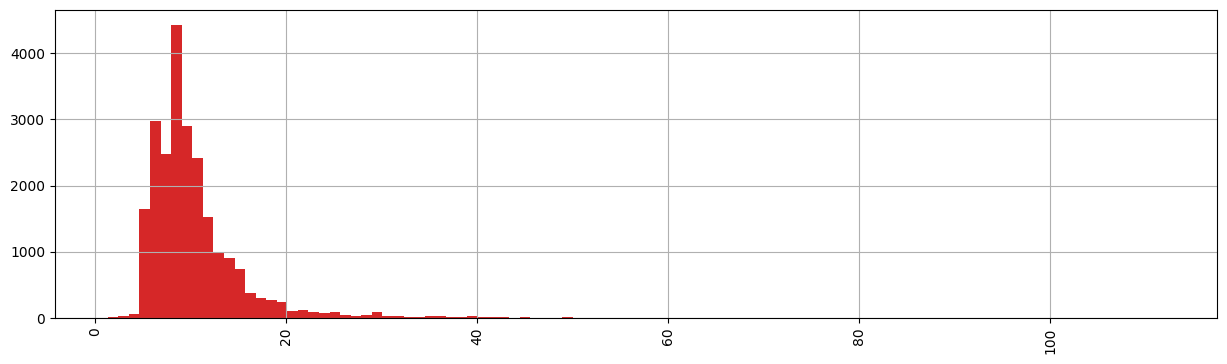

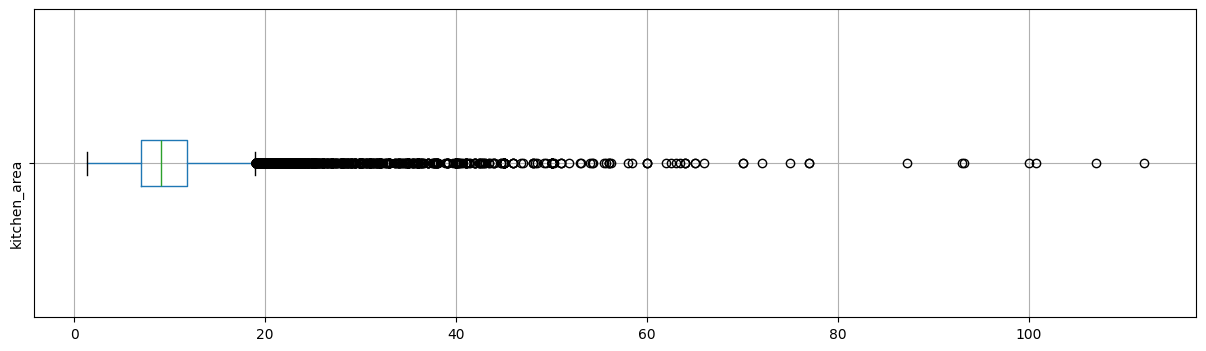


column name "balcony"

count    23313.000000
mean         0.591987
std          0.959612
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


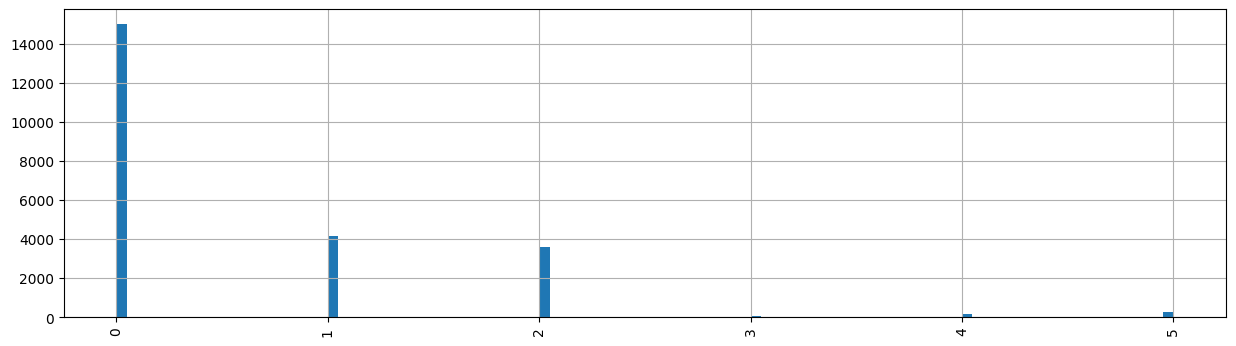

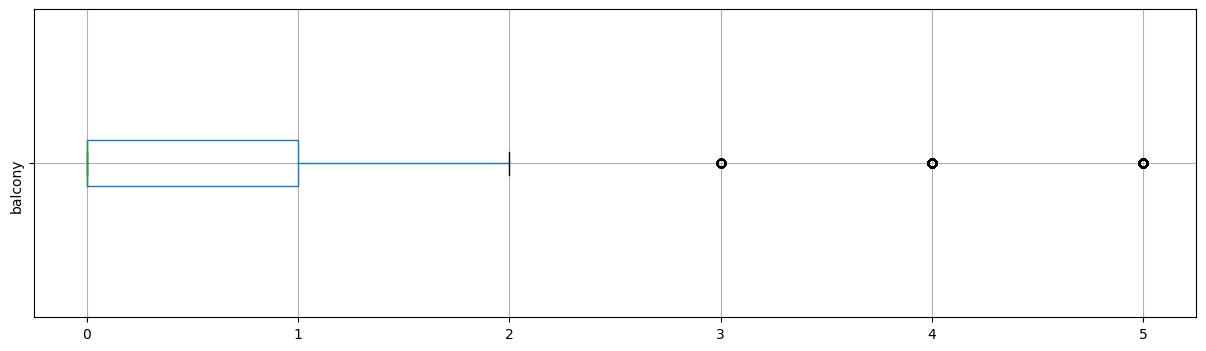


column name "locality_name"

count               23313
unique                318
top       Санкт-Петербург
freq                15483
Name: locality_name, dtype: object


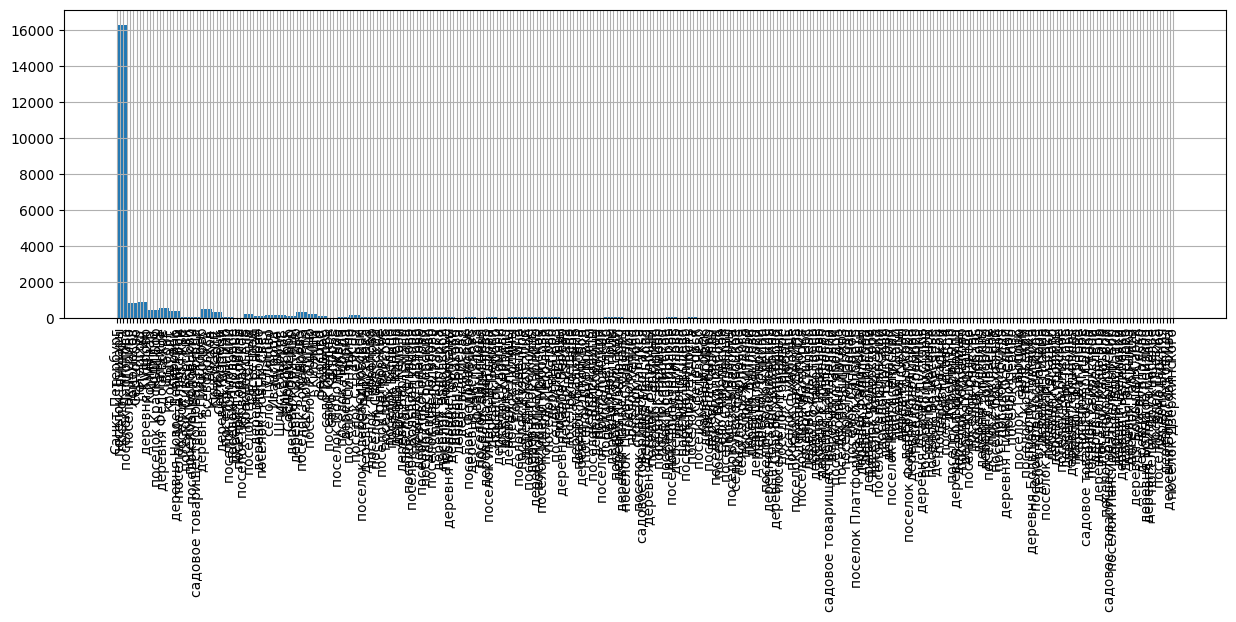


column name "airports_nearest"

count    17866.000000
mean     28819.157898
std      12647.143802
min          0.000000
25%      18557.000000
50%      26773.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64


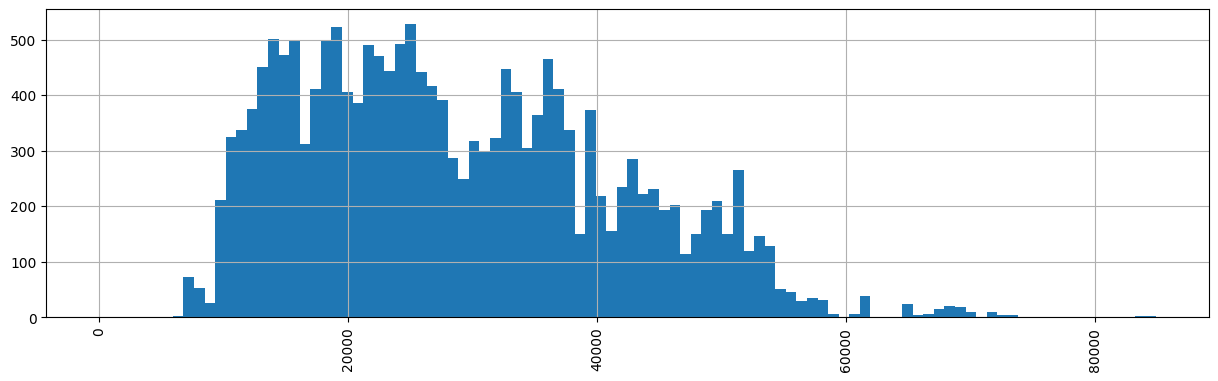

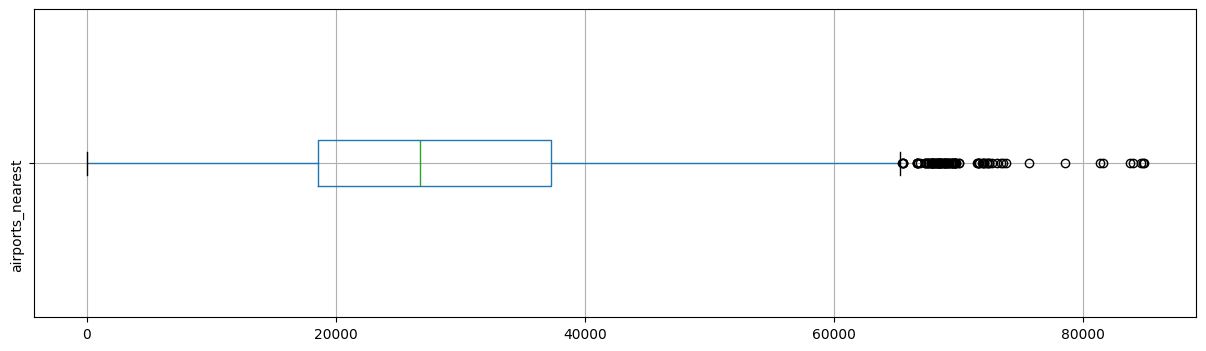


column name "cityCenters_nearest"

count    17886.000000
mean     14223.809180
std       8620.431357
min        181.000000
25%       9274.750000
50%      13111.500000
75%      16296.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


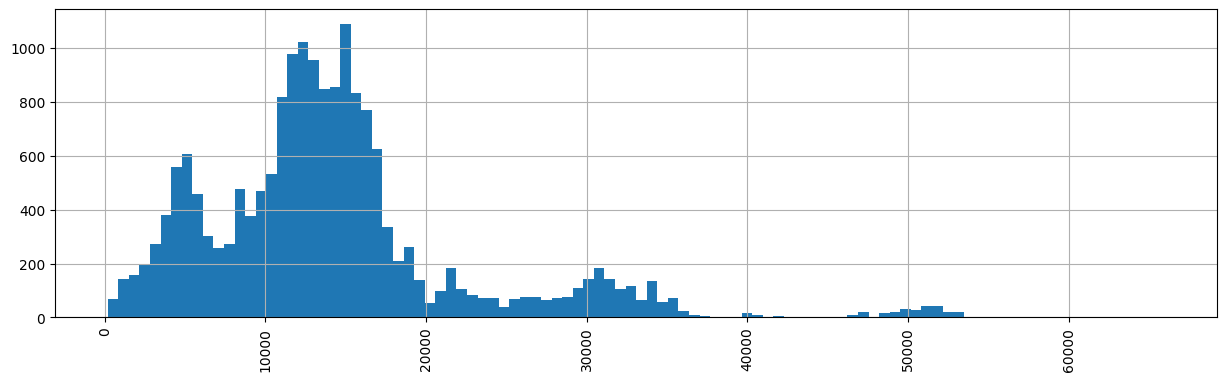

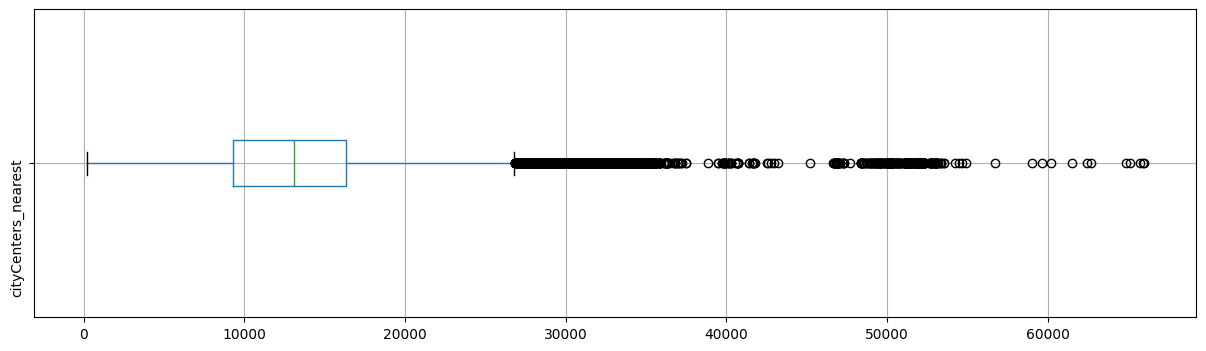


column name "parks_around3000"

count    17887.000000
mean         0.609884
std          0.800515
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


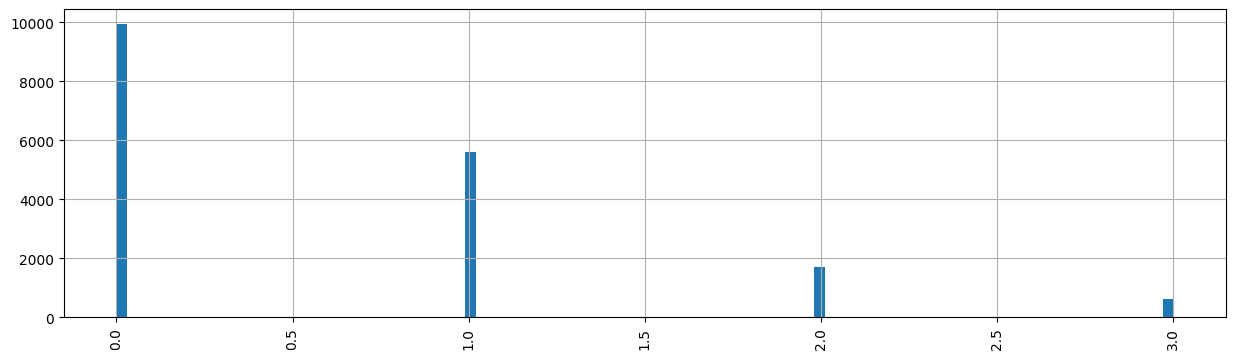

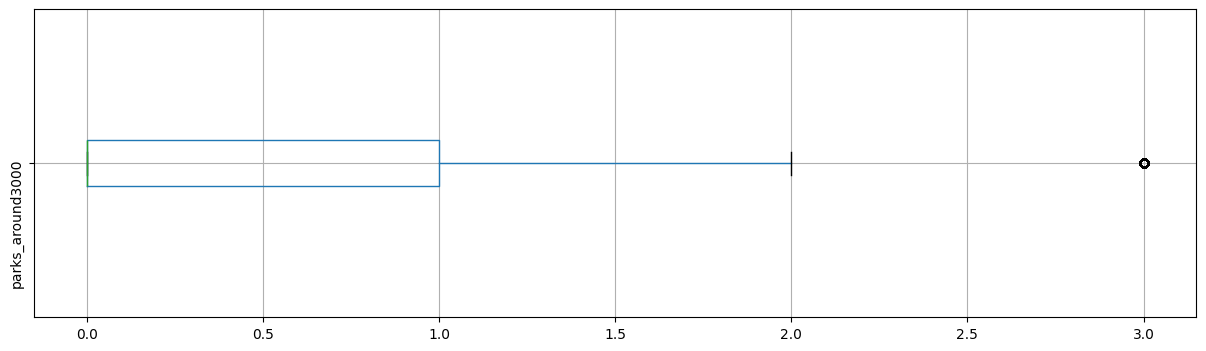


column name "parks_nearest"

count    7943.000000
mean      490.840992
std       341.050044
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


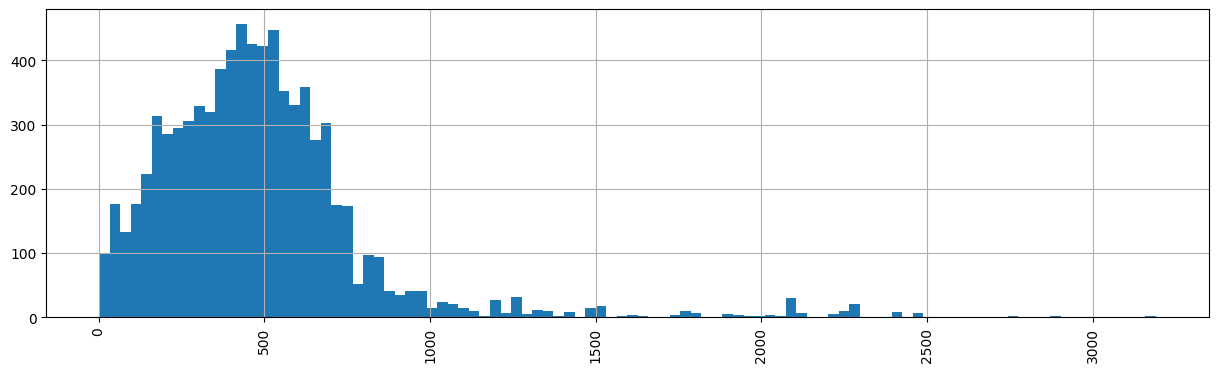

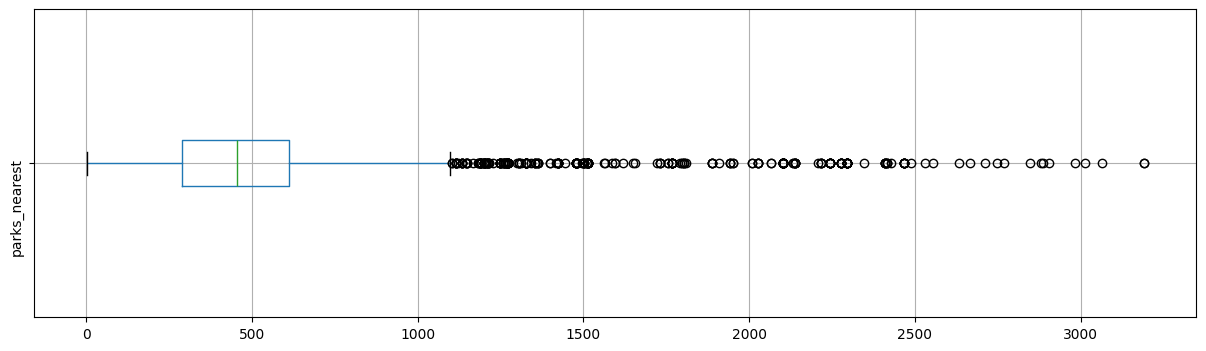


column name "ponds_around3000"

count    17887.000000
mean         0.767820
std          0.937042
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


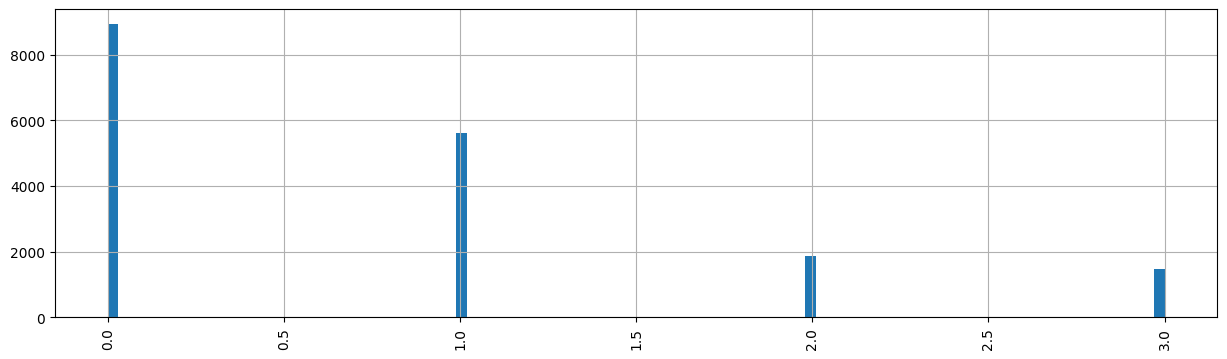

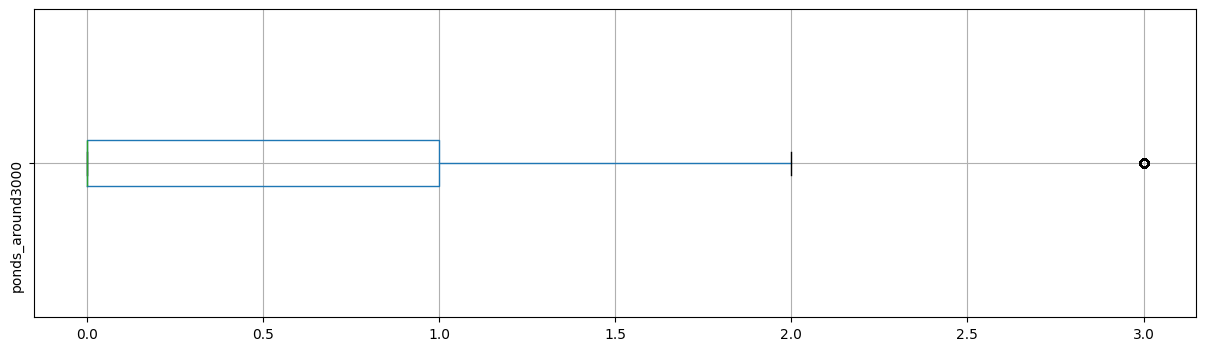


column name "ponds_nearest"

count    8943.000000
mean      518.141675
std       278.095386
min        13.000000
25%       293.000000
50%       503.000000
75%       730.500000
max      1344.000000
Name: ponds_nearest, dtype: float64


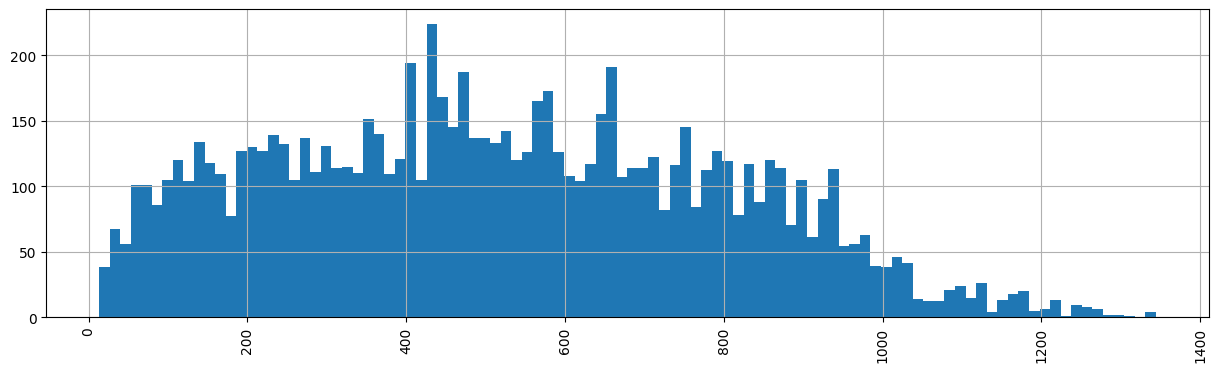

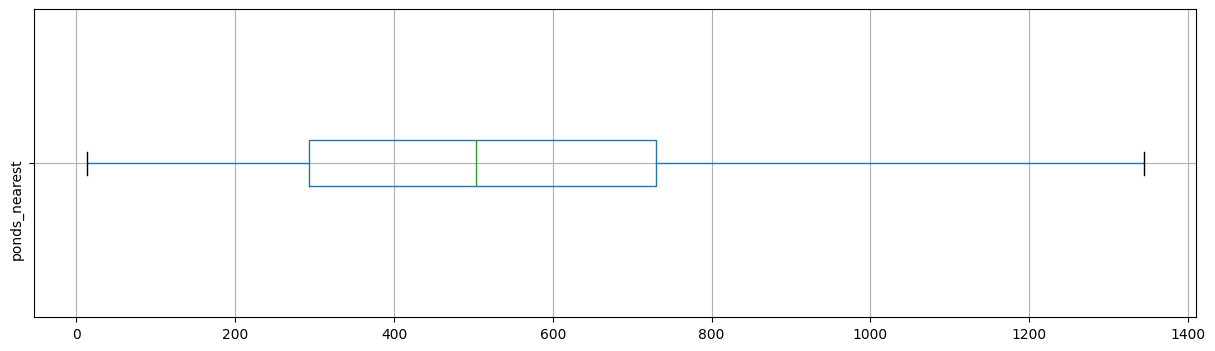


column name "days_exposition"

count    20172.000000
mean       180.849544
std        219.715129
min          1.000000
25%         45.000000
50%         95.000000
75%        231.250000
max       1580.000000
Name: days_exposition, dtype: float64


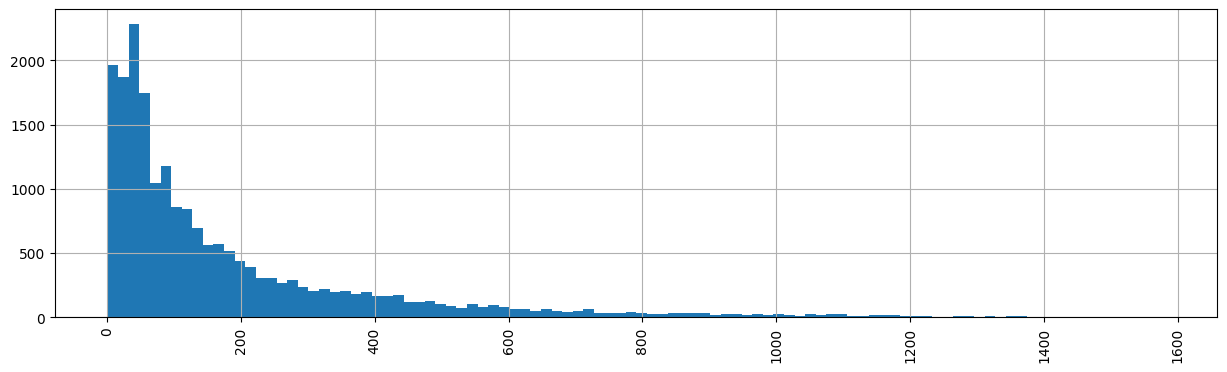

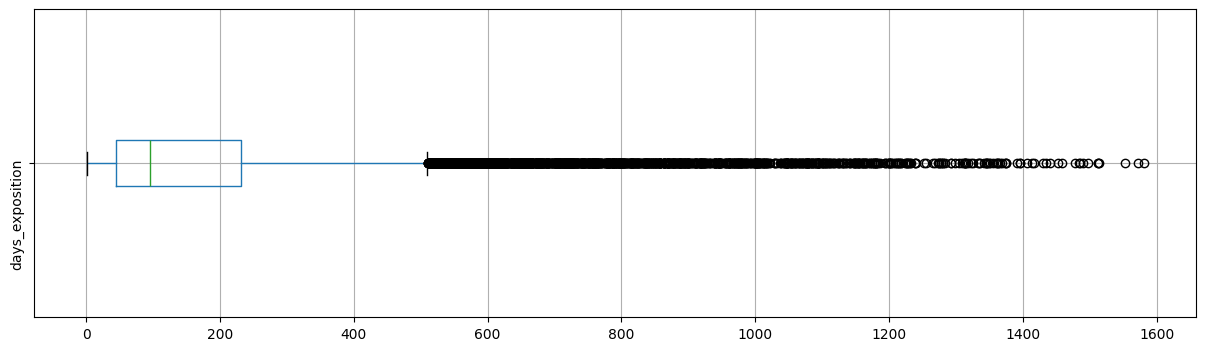


column name "1_sq_m_price"

count    2.331300e+04
mean     9.910499e+04
std      4.954216e+04
min      1.118349e+02
25%      7.653061e+04
50%      9.486166e+04
75%      1.140000e+05
max      1.907500e+06
Name: 1_sq_m_price, dtype: float64


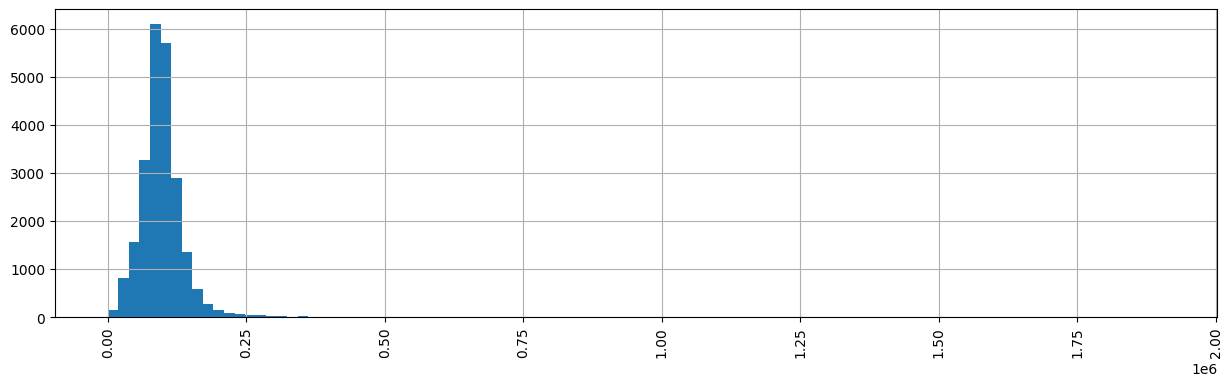

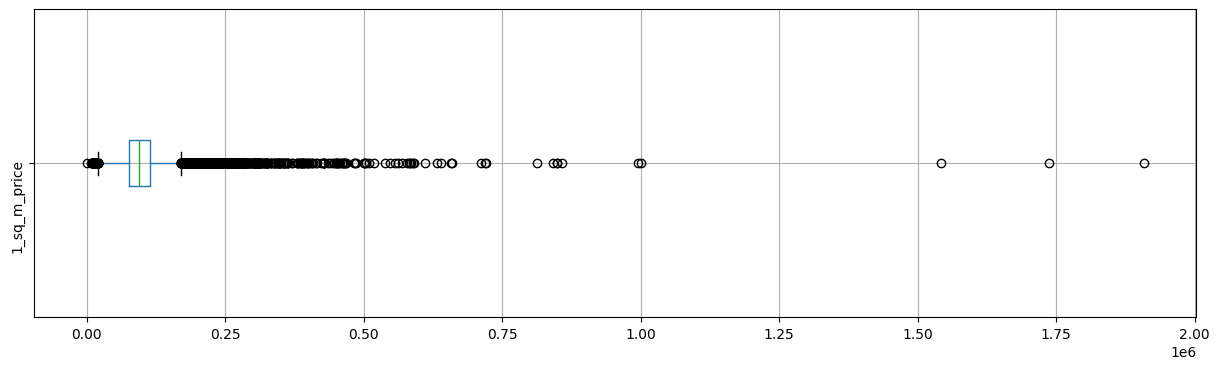


column name "day_of_week"

count        23313
unique           7
top       Thursday
freq          4231
Name: day_of_week, dtype: object


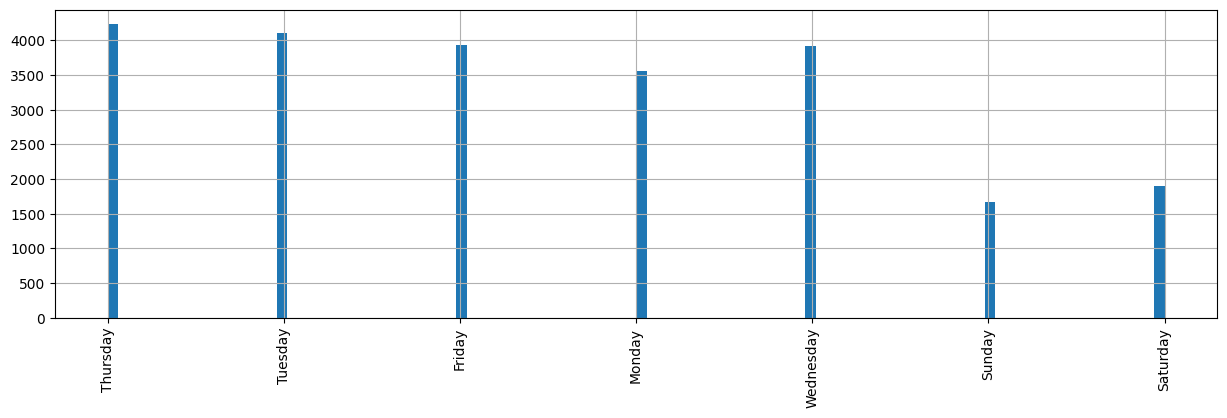


column name "month"

count    23313.000000
mean         6.397932
std          3.493408
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


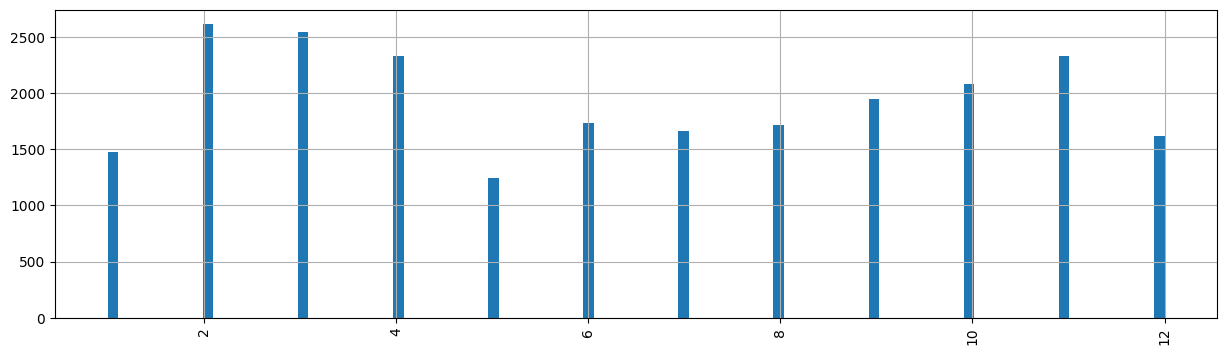

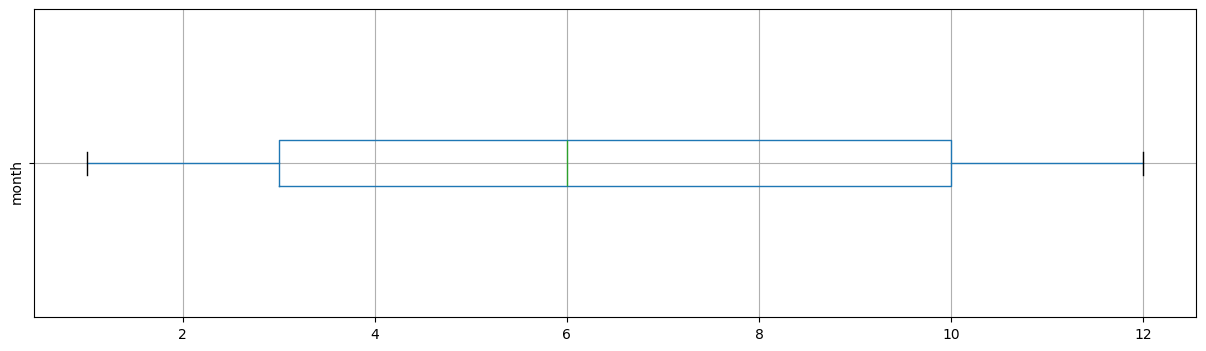


column name "year"

count    23313.000000
mean      2017.371252
std          1.036810
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64


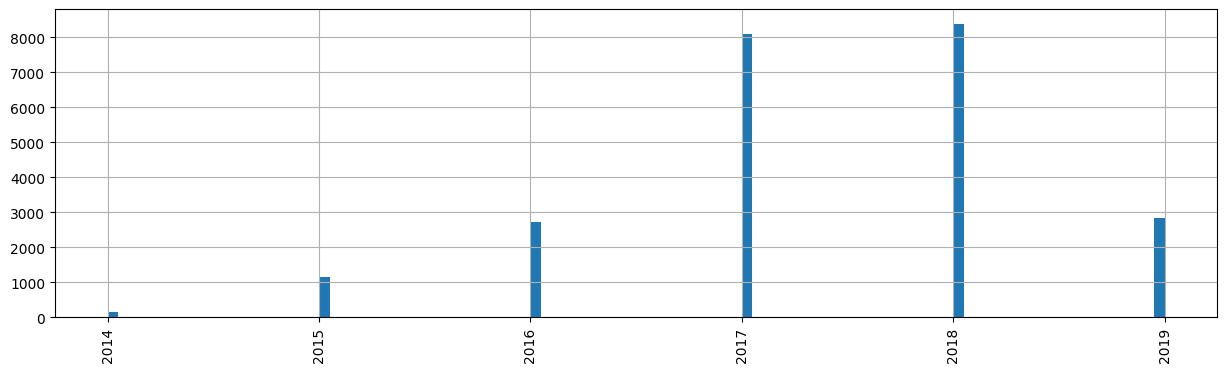

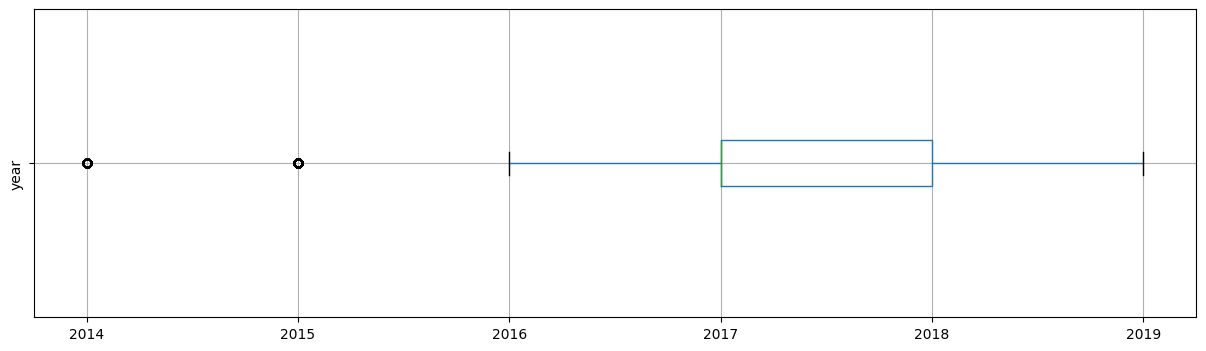


column name "floor_type"

count      23313
unique         3
top       другой
freq       17168
Name: floor_type, dtype: object


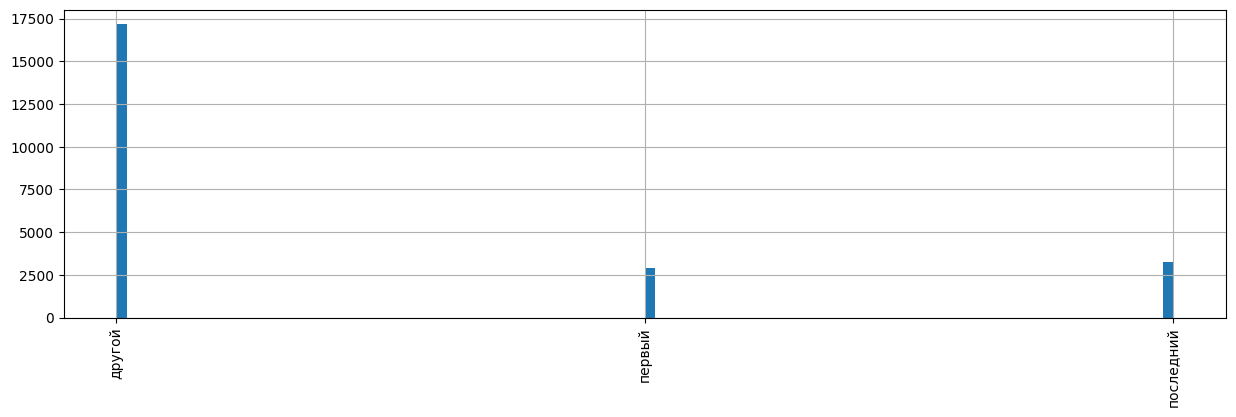


column name "cityCenters_nearest_km"

count    17886.000000
mean        14.223809
std          8.620431
min          0.181000
25%          9.274750
50%         13.111500
75%         16.296000
max         65.968000
Name: cityCenters_nearest_km, dtype: float64


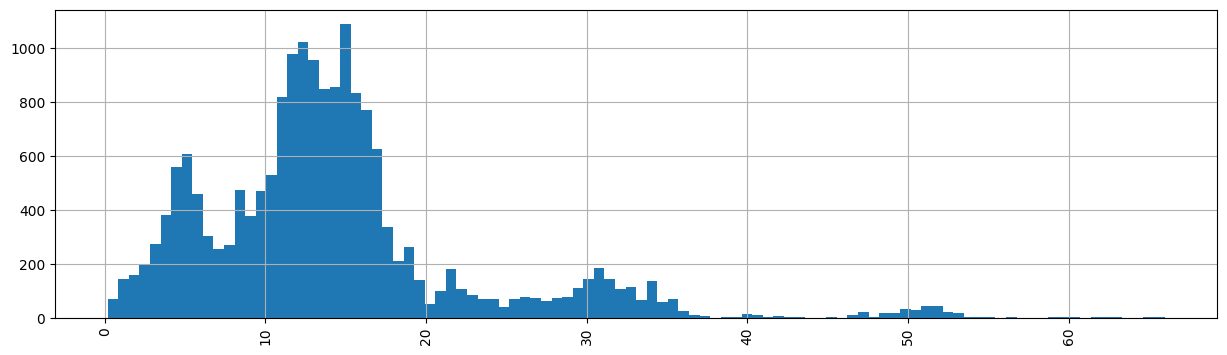

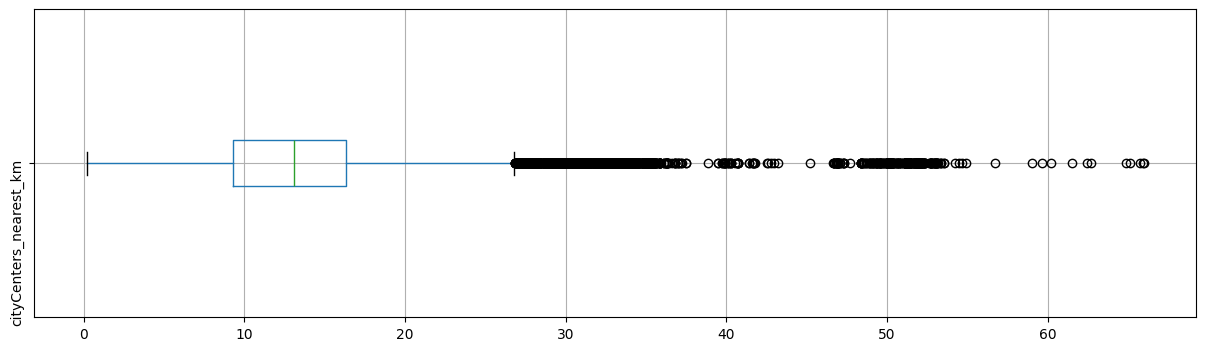

In [74]:
for column in data.columns:
    print('')
    print('column name "{}"'.format(column))
    print('')
    try:
        print(data[column].describe())
        data[column].hist(bins=100, figsize=(15,4), xrot=90)
        plt.show()
        data.boxplot(column=column ,figsize=(15, 4), vert=False, rot = 90, fontsize=10)
        plt.show()
    except:
        pass

**Comments on Histograms and Boxplots**

- **Total Images:** Most listings have between 3 to 19 photos. Outliers start at 26 photos. The median number of photos is 9, with a maximum of 50. Over 1000 listings were posted without photos. Standard deviation is approximately 5.6. The distribution from 3 to 19 resembles a normal distribution.
- **Price:** The median price is 4.615 million, the mean is 6.495 million, and the maximum is 763 million. Outliers start at around 26 million. The standard deviation is 10.7 million, and the distribution resembles a Poisson distribution.
- **Total Area:** The median total area is 52 sq. meters, the mean is 60 sq. meters, and the maximum is 900 sq. meters. Outliers start at around 130 sq. meters. The standard deviation is large at 35.1, resembling a Poisson distribution.
- **Number of Rooms:** The median and mean number of rooms is 2, with a maximum of 19. Outliers start at around 6 rooms. The standard deviation is 1, following a Poisson distribution.
- **Ceiling Height:** The median ceiling height is 2.6 meters (in line with recent norms), and the mean is 2.7 meters. Outliers range from a left tail at 2.25 meters to a right tail at 3.2 meters and above. The standard deviation is 0.21.
- **Number of Floors:** The median number of floors is 9, the mean is 10, and the maximum is 60. Outliers start at around 29 floors. The standard deviation is 6.5.
- **Living Area:** The median living area is 30 sq. meters, the mean is 34.4 sq. meters, and the maximum is 409.7 sq. meters. Outliers start at around 62 sq. meters. The standard deviation is large at 22, resembling a Poisson distribution.
- **Floor Number:** The median floor number is 4, the mean is 5.8, and the maximum is 33. Outliers are around 17. The standard deviation is 4.86, following a Poisson distribution.
- **Kitchen Area:** The median kitchen area is 9 sq. meters, the mean is 10.5 sq. meters, and the maximum is 112 sq. meters. Outliers start at around 19 sq. meters. The standard deviation is 5.88, resembling a Poisson distribution.
- **Balconies:** Most properties have no balconies, with a maximum of 5. About 8000 listings have 1-2 balconies. Outliers start at 3.
- **Location:** The majority of listings are in Saint Petersburg, with a total of 318 populated areas in the dataset.
- **Distance to Airport:** The median distance to the airport is 26 km, the mean is 29 km, and the maximum is 84 km. Outliers start at around 63 km. The standard deviation is 12.6, following a Poisson distribution.
- **Distance to City Center:** The median distance to the city center is 13 km, the mean is 14 km, and the maximum is 66 km. Outliers start at around 28 km. The standard deviation is 8.6, resembling a Poisson distribution.
- **Number of Parks:** Half of the listings report zero parks nearby. Outliers start at 2.
- **Distance to Park:** The median distance to a park is 455 meters, the mean is 491 meters, and the maximum is 3 km. Outliers start at around 1.1 km. The standard deviation is 341 meters, resembling a Poisson distribution.
- **Number of Bridges:** Slightly less than half of the listings report zero bridges nearby. Outliers start at 2.
- **Distance to Bridge:** The median distance to a bridge is 503 meters, the mean is 518 meters, and the maximum is 1.3 km. No outliers. The standard deviation is 278 meters, resembling a Poisson distribution.
- **Price per Sq. Meter:** The median price per square meter is 90 thousand, the mean is 100 thousand, and the maximum is 1.9 million. Outliers start at around 150 thousand. The standard deviation is 49.8 thousand, following a Poisson distribution.


**It is necessary to get rid of emissions in some respects. Taking into account the histograms, I thought it would make sense to filter outliers by total_area, last_price, ponds_nearest, rooms, days_exposition. This will help remove non-standard apartment options that distort the data. Some parameters (this is my assumption) are not so significant for determining the price of an apartment (it is calculated by the total area) or its attractiveness, in particular, the size of kitchens or living space can be adjusted if the buyer wishes. Other parameters, such as proximity to the center, bridges and airports, do not require removal of emissions, in my opinion (since the size of the agglomeration in question is too large).**

**I accept the upper limit for an area of ​​120 square meters and increase emissions larger than this value from the table. At the same time, we do not get rid of all emissions, and retain a certain number of large apartments, while removing super-large ones.**

In [75]:
data = data.query('total_area < 120')

**I accept the upper limit for the cost of 40 million, and remove outliers greater than this value from the table.**

In [76]:
data = data.query('last_price < 40000000')

<Axes: >

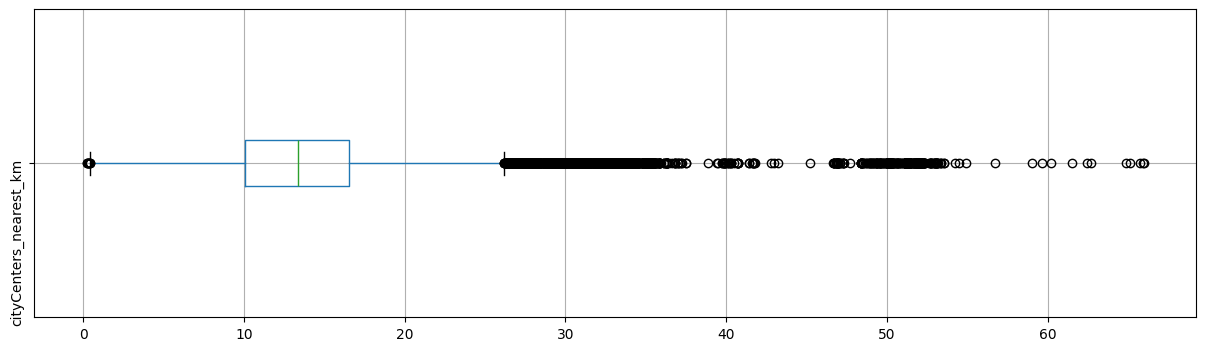

In [77]:
data.boxplot(column=column ,figsize=(15, 4), vert=False, rot = 90, fontsize=10)

**Taking into account the histogram above and the emissions graph, we accept a value less than 1000.**

In [78]:
data = data.query('days_exposition < 1000')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19146 entries, 1 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            19146 non-null  int64         
 1   last_price              19146 non-null  int32         
 2   total_area              19146 non-null  float64       
 3   first_day_exposition    19146 non-null  datetime64[ns]
 4   rooms                   19146 non-null  int64         
 5   ceiling_height          19146 non-null  float64       
 6   floors_total            19146 non-null  int32         
 7   living_area             19146 non-null  float64       
 8   floor                   19146 non-null  int64         
 9   is_apartment            19146 non-null  bool          
 10  studio                  19146 non-null  bool          
 11  open_plan               19146 non-null  bool          
 12  kitchen_area            19146 non-null  float64    

In [80]:
data_drop_count = len(data) * 100 / len(initial_data)
'{}% of initial data was saved'.format(round(data_drop_count), 2)

'81% of initial data was saved'

**Speed ​​of apartment sales.**

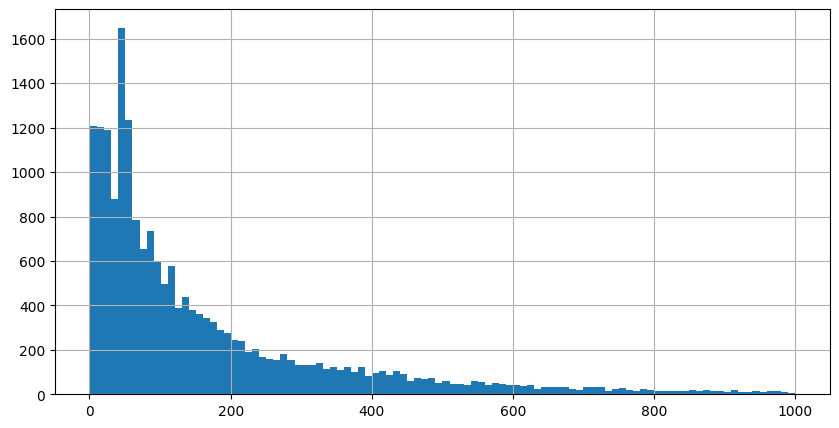

In [81]:
data['days_exposition'].hist(bins=100, figsize=(10,5))
data['days_exposition'].describe();

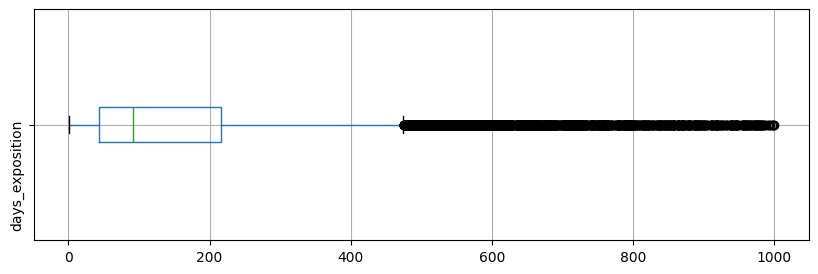

In [82]:
data.boxplot(column='days_exposition' ,figsize=(10, 3), vert=False, rot = 90, fontsize=10);

**Analysis of Sale Duration**

- **Boxplot Interpretation:** The lower whisker of the boxplot extends to 0, the minimum value, while the upper whisker ends around 470 days, marking the approximate boundary of the normal range. Values beyond this are considered outliers. Extremely high values are plotted as individual points but merge into a single thick line, indicating a substantial number of outliers. However, the values beyond the upper whisker are still rare. The median does not lean towards the long tail of high values.

- **Descriptive Statistics:** The `describe()` method reveals numerical values characterizing the distribution. The mean duration is 163 days, the median is 91 days, the minimum is 1 day, and the maximum is 999 days (considering previously removed outliers). 

- **Standard Deviation:** A relatively high standard deviation of 184 indicates data heterogeneity, anomalies, and outliers.

- **Sale Duration Categories:** 
  - **Fast Sales:** Sales within the first quartile, ranging from 1 to 44 days, can be considered fast.
  - **Lengthy Sales:** Sales lasting longer than the third quartile value, from 215 days onwards, are considered lengthy. 
  - **Anomalously Long Sales:** Sales extending beyond 470 days are classified as anomalously long.


**Зависимость цены от параметров:**

**Dependence of price on parameters:**

**- total area**

0.7119346229257132

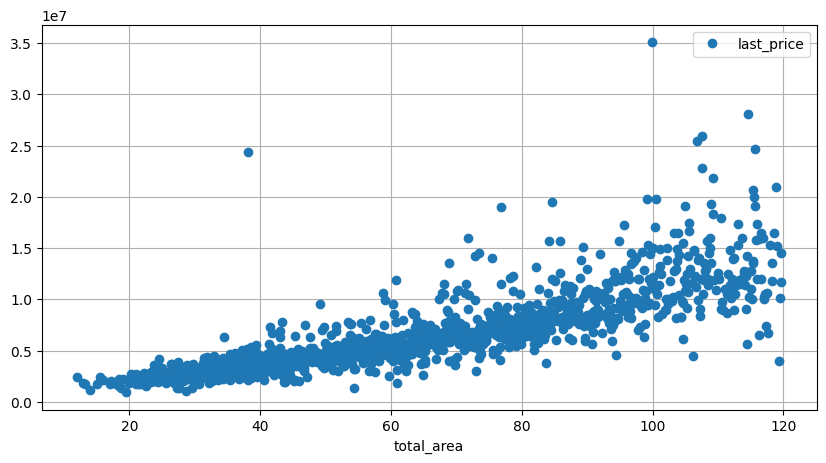

In [83]:
data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o')

data['total_area'].corr(data['last_price'])

**The graph and correlation coefficient showed the dependence of price on the size of the apartment.**

**- living space**

0.587166706425791

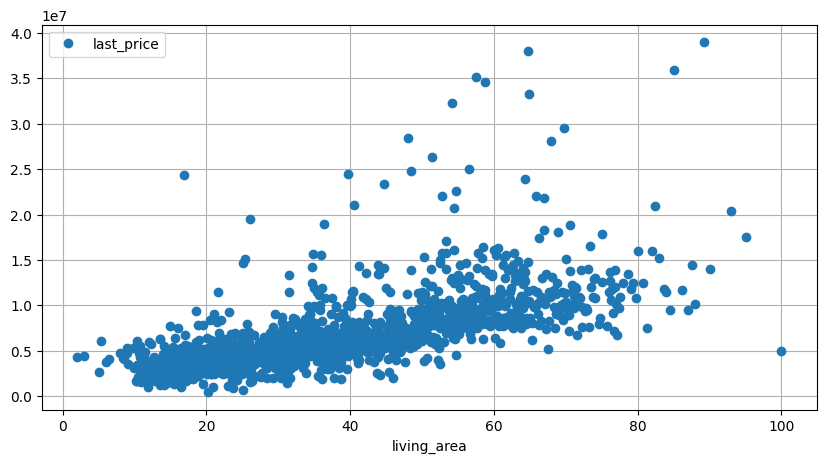

In [84]:
data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o')

data['last_price'].corr(data['living_area'])

**The graph and correlation coefficient showed the dependence of price on the size of living space, it also revealed some outliers.**

**- kitchen area**

0.5368467695503257

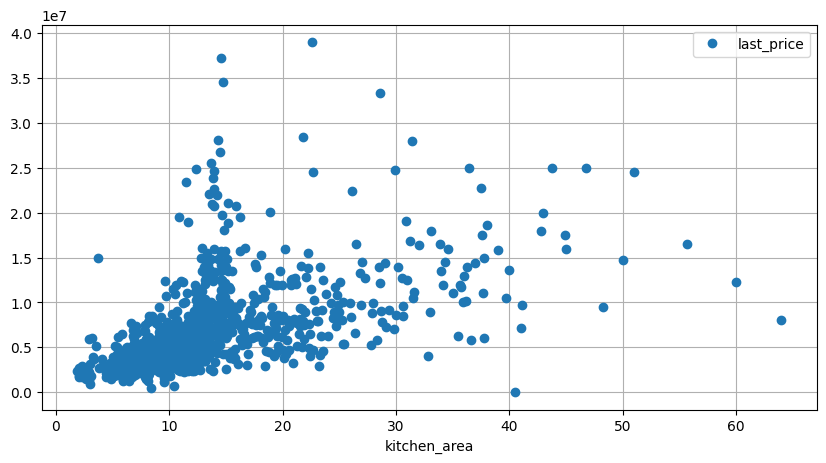

In [85]:
data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o')

data['last_price'].corr(data['kitchen_area'])

**The graph and correlation coefficient showed some dependence of the price on the size of the living space; it also revealed some outliers that were NOT adjusted, since this indicator may vary within the apartment.**

**- number of rooms**

0.4181327321671897

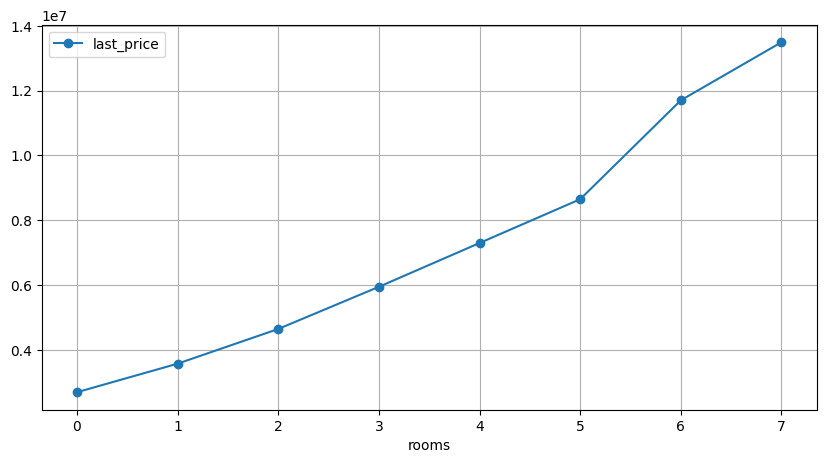

In [86]:
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')

data['last_price'].corr(data['rooms'])

**The graph and correlation coefficient showed the dependence of price on the number of rooms.**

**- floor on which the apartment is located (first, last, other)**

0.09301147131623416

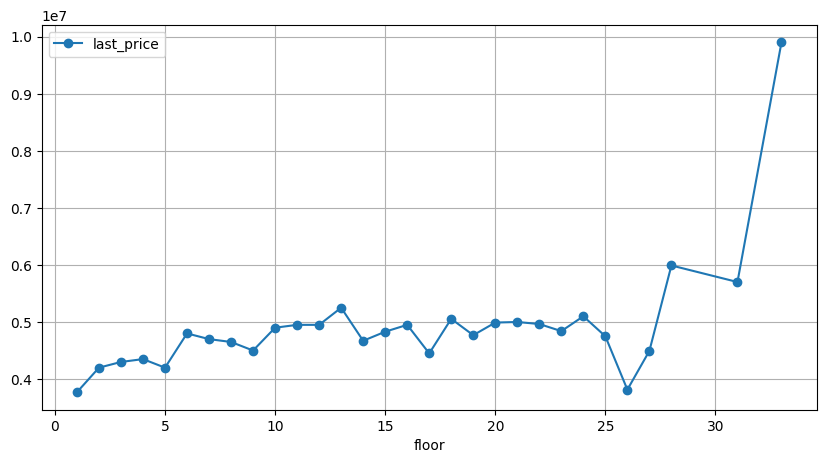

In [87]:
data.pivot_table(index = 'floor', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')

data['last_price'].corr(data['floor'])

33


0.6016619523934065

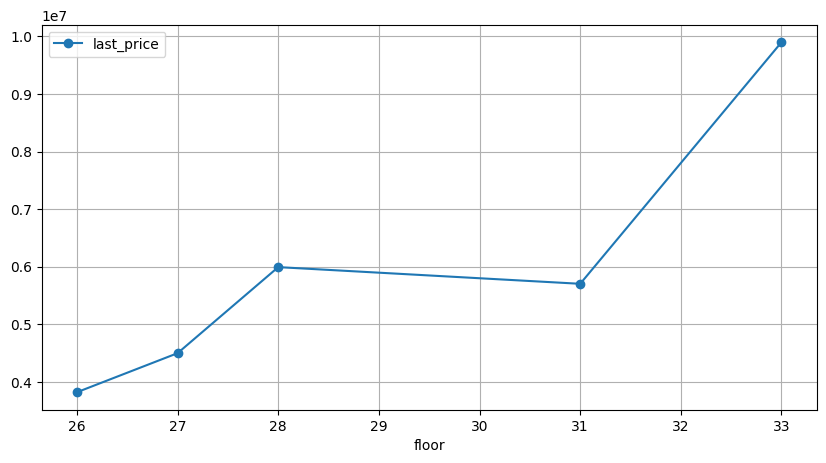

In [88]:
upper_check = data[data['floor']> 25]
print(len(upper_check))
upper_check.pivot_table(index = 'floor', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')

upper_check['last_price'].corr(data['floor'])

**In general, the graph and the correlation coefficient did not show a large dependence of price on the floor; the sample for the upper floors is too small to take into account the increase in cost on the upper floors.**

**- dates of placement (day of week, month, year)**

In [89]:
def day_of_week_numeric(x):
    if x.day_of_week == 'Monday':
        return 1
    elif x.day_of_week == 'Tuesday':
        return 2
    elif x.day_of_week == 'Wednesday':
        return 3
    elif x.day_of_week == 'Thursday':
        return 4
    elif x.day_of_week == 'Friday':
        return 5
    elif x.day_of_week == 'Saturday':
        return 6
    elif x.day_of_week == 'Sunday':
        return 7

data['day_of_week_numeric'] = data.apply(day_of_week_numeric, axis=1)

-0.0054986105266657944

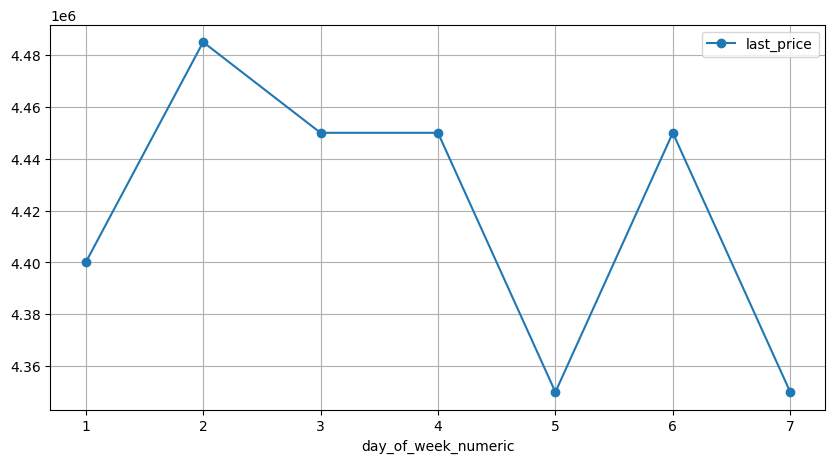

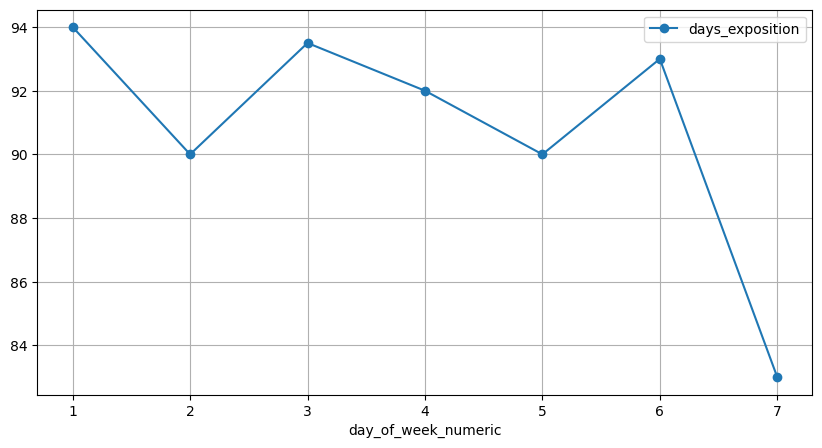

In [90]:
data.pivot_table(index = 'day_of_week_numeric', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')
data.pivot_table(index = 'day_of_week_numeric', values = 'days_exposition', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')

data['last_price'].corr(data['day_of_week_numeric'])

0.0013324965304848224

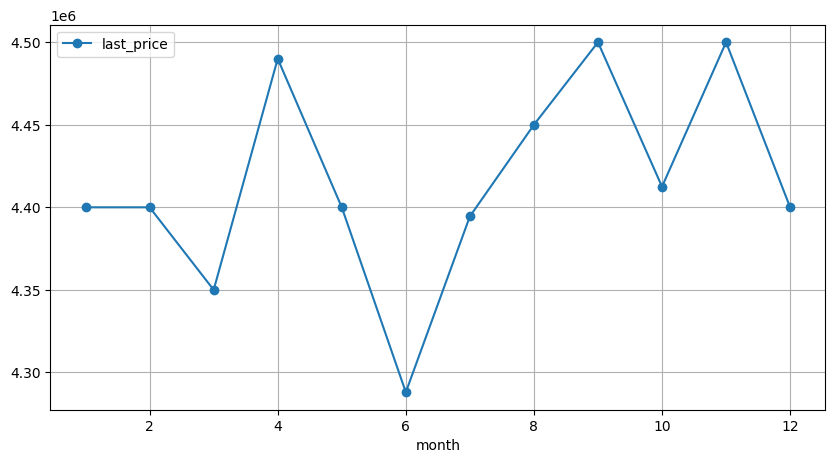

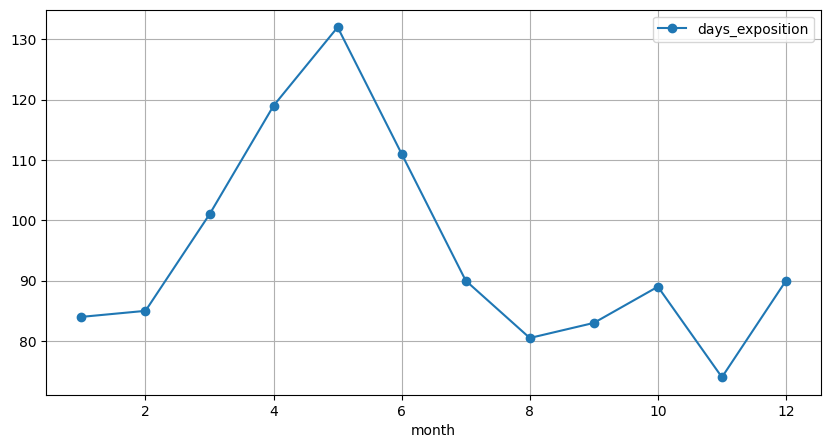

In [91]:
data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')
data.pivot_table(index = 'month', values = 'days_exposition', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')

data['last_price'].corr(data['month'])

-0.032666205094501986

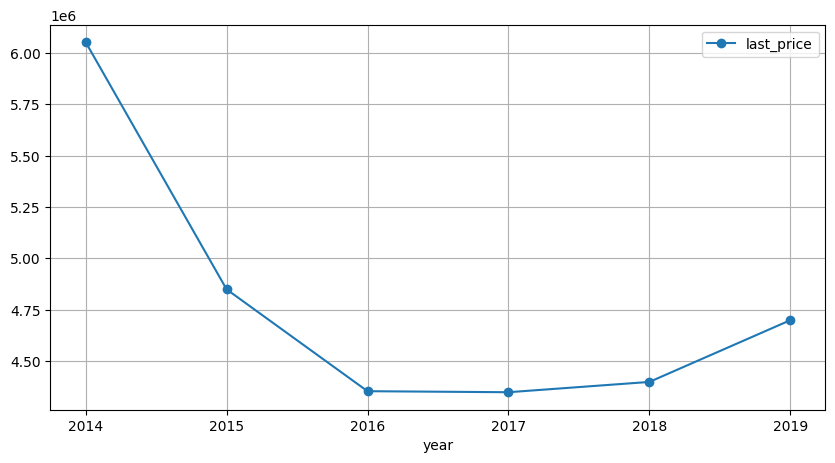

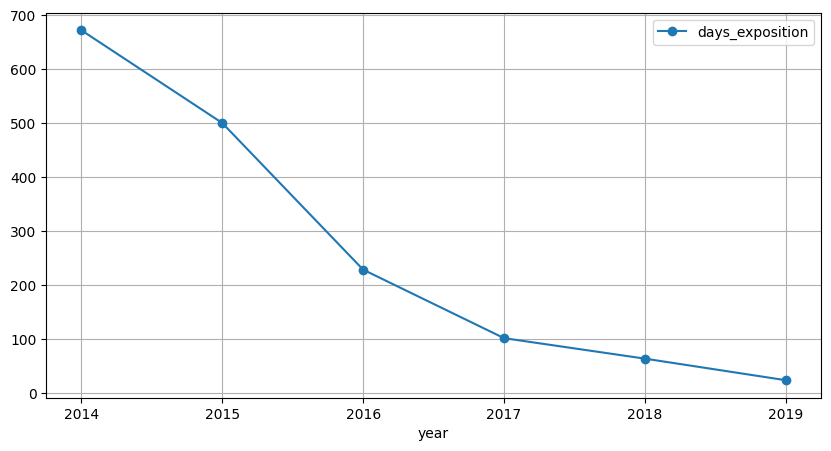

In [92]:
data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')
data.pivot_table(index = 'year', values = 'days_exposition', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')

data['last_price'].corr(data['year'])

0.04386952841606007

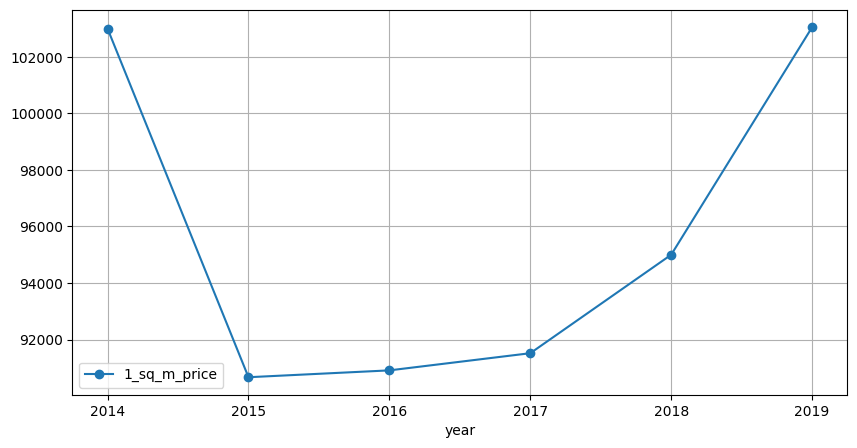

In [93]:
data.pivot_table(index = 'year', values = '1_sq_m_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')

data['1_sq_m_price'].corr(data['year'])

**Judging by the correlation coefficient, there is no dependence of the cost on the placement date.**

**The average price of one square meter in 10 localities with the largest number of advertisements.**

In [94]:
filter_by_count = data['locality_name'].value_counts()[:10]
data_filtered = data[data['locality_name'].isin(filter_by_count.index)]
data.pivot_table(index = data_filtered['locality_name'], values = '1_sq_m_price').sort_values(
    by='1_sq_m_price', ascending=False)

,1_sq_m_price
locality_name,
Санкт-Петербург,108359.135721
Пушкин,101415.024968
деревня Кудрово,92394.167442
поселок Парголово,89544.906805
поселок Мурино,85501.441537
поселок Шушары,77601.792265
Колпино,74799.249171
Всеволожск,68548.841118
Гатчина,67967.793195


**The highest price of the 10 most popular settlements is in St. Petersburg, and the lowest is in Vyborg.**

**Average price of each kilometer in St. Petersburg.**

In [95]:
km_price = data[data['locality_name'] == 'Санкт-Петербург'][
    'last_price'] / data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest_km']
km_price.mean()

825024.51067676

**Cost km = 825025.**

**Dependence of the cost of objects on the distance to the city center.**

-0.3424670229279343

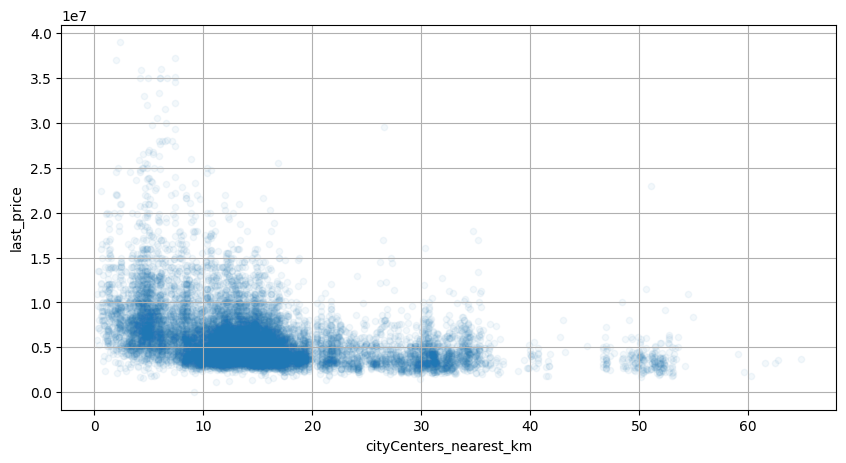

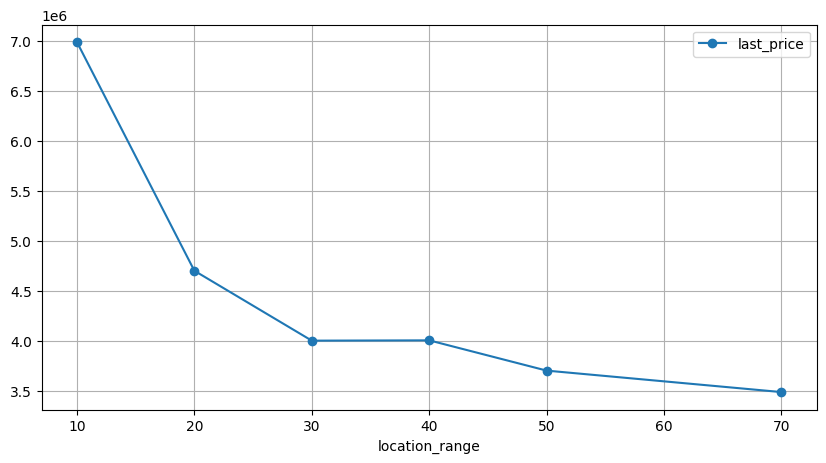

In [96]:
# data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'median').plot(
#     grid = True, figsize = (10, 5), style = 'o', alpha=0.05)
def location_radius(x):
    if 0 < x <= 10:
        return 10
    elif 10 < x <= 20:
        return 20
    elif 20 < x <= 30:
        return 30
    elif 30 < x <= 40:
        return 40
    elif 40 < x <= 50:
        return 50
    elif 50 < x <= 70:
        return 70

data['location_range'] = data['cityCenters_nearest_km'].apply(location_radius)
data.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter',  grid = True, figsize = (10, 5), alpha=0.05)
data.pivot_table(index = 'location_range', values = 'last_price', aggfunc = 'median').plot(
    grid = True, figsize = (10, 5), style = 'o-')
data['cityCenters_nearest_km'].corr(data['last_price'])

**The connection between the distance from the center and the cost can be traced.**

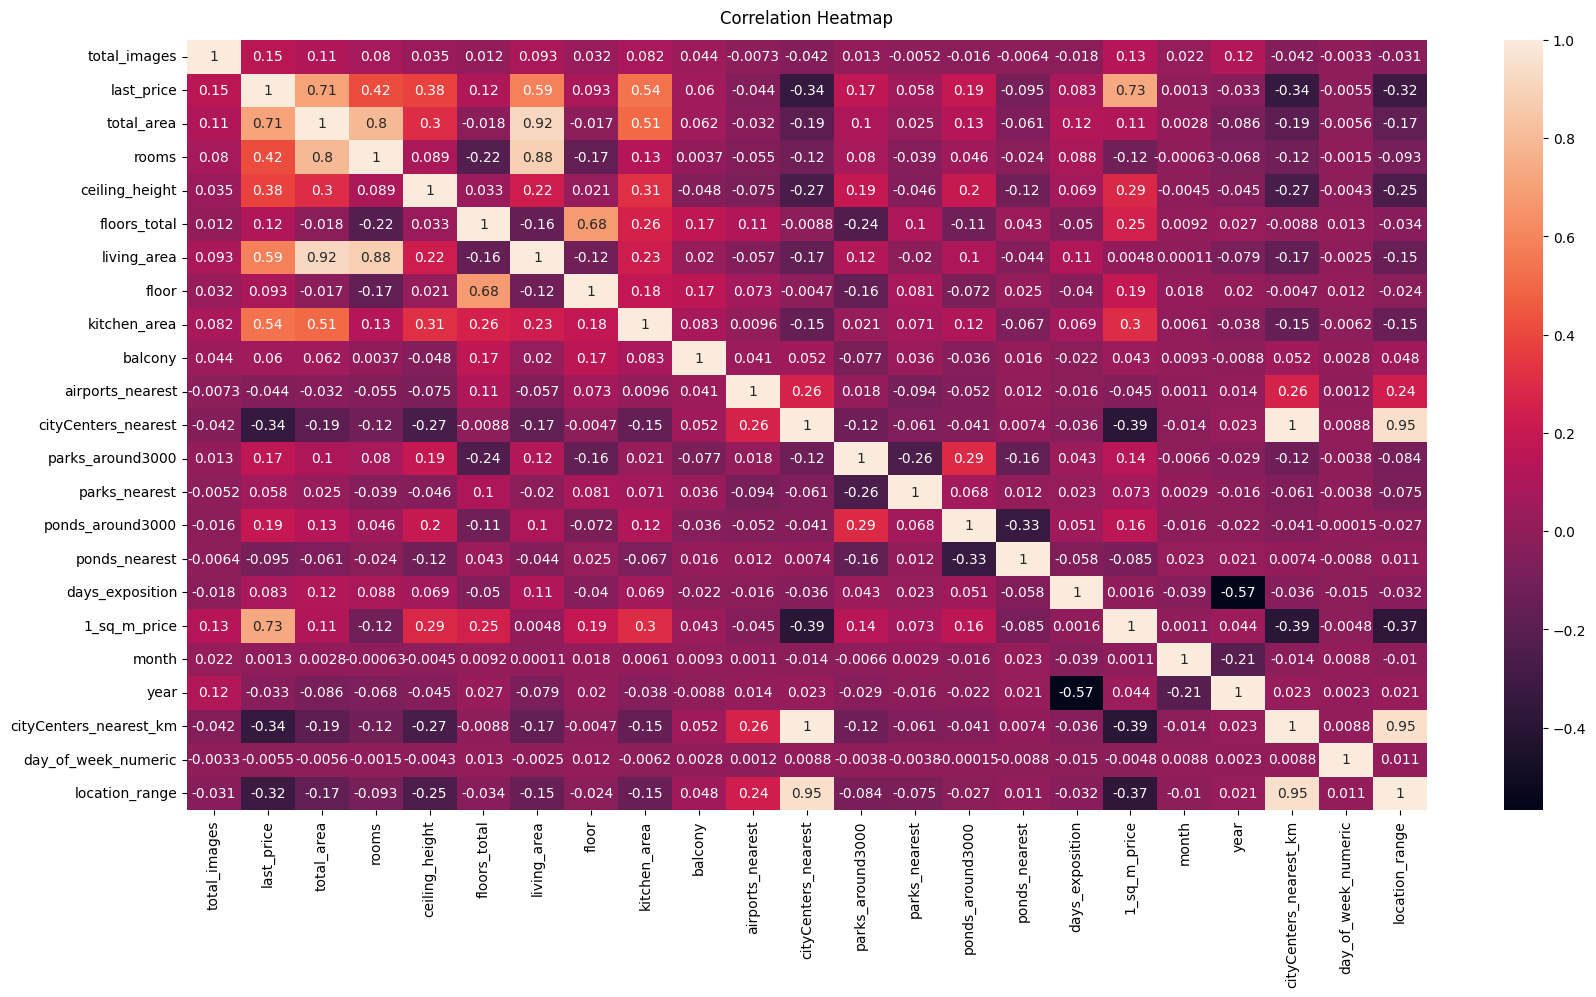

In [99]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(corr_matrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

### General conclusion

**Project Analysis: Real Estate Prices and Characteristics in Saint Petersburg and Its Surrounding Area**

**Key Findings from Data Analysis:**

- Identified missing data and incorrect data types in some columns.
- Detected outliers and anomalies in the data.
- No apparent duplicates were found.

**Data Type Changes:**

- `floors_total` (int) - changed to an integer.
- `balcony` (int) - changed to an integer.
- `first_day_exposition` - changed to a date format.

**Data Cleaning and Missing Data Handling:**

- Small numbers of missing values in `floors_total` and `locality_name` columns were handled by deleting rows with NaNs.
- Missing values in `is_apartment` were replaced with False, assuming they were omitted for standard apartments.
- Missing values in the `balcony` column were interpreted as no balconies and replaced with 0.
- Inconsistencies in the names of localities (mainly concerning settlements) were standardized.
- Anomalous ceiling heights, likely recorded in units other than meters, were converted to meters. Extremely high values over 4 meters and low values under 1.8 meters were removed. Missing values were replaced with the median, assuming standard ceiling heights between 2.4 to 2.7 meters, depending on the building's floors and year of construction.
- In studio apartments, the kitchen is part of the general living space, so kitchen sizes were set to 0.
- Missing values in `living_area` were filled based on the strong correlation with `total_area`. This was done by grouping total area values and taking the median ratio of total to living area.

**Additional Columns Added:**

- Price per square meter.
- Day of the week of advertisement publication (0 - Monday, 1 - Tuesday, etc.).
- Month and year of advertisement publication.
- Type of apartment floor (values - "first", "last", "other").
- Distance in km to the city center.

**Outlier Removal:**

- Removed properties with areas over 120 sq. meters.
- Removed listings with prices over 20 million.
- Removed listings that were on the market for over 1000 days.

**Histogram and Boxplot Analysis Conclusions:**

- Most listings had between 3 to 19 photos. Outliers start from 26 photos upwards. The median number of photos was 9, with a maximum of 50. Over 1000 listings were posted without photos. The standard deviation was about 5.6, resembling a normal distribution.
- The median housing price was 4.615 million, with an average of 6.495 million, and a maximum of 763 million. Outliers started from approximately 26 million. The standard deviation was 10.7 million, resembling a Poisson distribution.
- The median total area was 52 sq. meters, with an average of 60 sq. meters, and a maximum of 900 sq. meters. Outliers started from approximately 130 sq. meters. The standard deviation was large at 35.1, resembling a Poisson distribution.
- The median number of rooms was 2, with a maximum of 19. Outliers started from around 6 rooms. The standard deviation was 1, following a Poisson distribution.
- The median ceiling height was 2.6 meters, with an average of 2.7 meters. Outliers ranged from a left tail at 2.25 meters to a right tail at 3.2 meters and above. The standard deviation was 0.21.
- The median number of floors was 9, with an average of 10 and a maximum of 60. Outliers started from approximately 29 floors. The standard deviation was 6.5.
- The median living area was 30 sq. meters, with an average of 34.4 sq. meters, and a maximum of 409.7 sq. meters. Outliers started from approximately 62 sq. meters. The standard deviation was large at 22, resembling a Poisson distribution.
- The median kitchen area was 9 sq. meters, with an average of 10.5 sq. meters, and a maximum of 112 sq. meters. Outliers started from approximately 19 sq. meters. The standard deviation was 5.88, resembling a Poisson distribution.
- Most properties had no balconies, with a maximum of 5. About 8000 listings had 1-2 balconies. Outliers started from 3.
- The largest number of listings was in Saint Petersburg, with a total of 318 populated areas in the dataset.
- The median distance to the airport was 26 km, with an average of 29 km, and a maximum of 84 km. Outliers started from approximately 63 km. The standard deviation was 12.6, resembling a Poisson distribution.
- The median distance to the city center was 13 km, with an average of 14 km, and a maximum of 66 km. Outliers started from approximately 28 km. The standard deviation was 8.6, resembling a Poisson distribution.
- Half of the listings reported zero parks nearby. Outliers started from 2.
- The median distance to a park was 455 meters, with an average of 491 meters, and a maximum of 3 km. Outliers started from approximately 1.1 km. The standard deviation was 341 meters, resembling a Poisson distribution.
- Slightly less than half of the listings reported zero bridges nearby. Outliers started from 2.
- The median distance to a bridge was 503 meters, with an average of 518 meters, and a maximum of 1.3 km. No outliers. The standard deviation was 278 meters, resembling a Poisson distribution.
- The median price per square meter was 90 thousand, with an average of 100 thousand, and a maximum of 1.9 million. Outliers started from approximately 150 thousand. The standard deviation was 49.8 thousand, following a Poisson distribution.

**Analysis of Sale Speed:**

- The lower whisker of the boxplot extends to 0, the minimum value, while the upper whisker ends around 470 days, marking the approximate boundary of the normal range. Values beyond this are considered outliers. Extremely high values are plotted as individual points but merge into a single thick line, indicating a substantial number of outliers. However, the values beyond the upper whisker are still rare. The median does not lean towards the long tail of high values. The `describe()` method reveals numerical values characterizing the distribution. The mean duration is 163 days, the median is 91 days, the minimum is 1 day, and the maximum is 999 days (considering previously removed outliers). A relatively high standard deviation of 184 indicates data heterogeneity, anomalies, and outliers. Generally, sales lasting from 1 to 44 days can be considered quick, while those lasting more than 215 days (beyond the third quartile) are lengthy. Sales extending beyond 470 days are classified as anomalously long.

**Dependency of Property Price on Various Parameters:**

- A dependency of price on total area was observed, showing a correlation between price and apartment size.
- Some dependency of price on living area was noted.
- A correlation between price and the number of rooms was identified.
- The floor on which the apartment is located (first, last, other) showed a general lack of correlation with price, though apartments on the top floor tended to be more expensive.
- The correlation coefficient did not indicate a significant dependency of price on the date of posting.

The average price per square meter was calculated for the 10 most populated localities with the highest number of listings. The highest price among these was in Saint Petersburg, and the lowest was in Vyborg.

The average price per kilometer in Saint Petersburg was calculated to be 825,025 rubles.

A dependency of property prices on the distance to the city center was also established.